In [23]:
# Import useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import h5py
import math
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from matplotlib import cm

In [25]:
print("Current working directory:", os.getcwd())

Current working directory: /Users/boxiao/Research/Tensor_Networks/Non_Abelian_Anyons


In [27]:
goldenRatio = (5**.5 - 1) / 2.

In [29]:
'''
    Truncate colors from continuous color palette
'''

def obtain_colors(number_of_lines, palette):
    color_interval = np.linspace(0, 1, number_of_lines)
    colors = [palette(x) for x in color_interval]
    return colors

In [79]:
'''
    A simple function to extrapolate data from HDF5 file
'''

def data_extrapolation(file_name, label):
    tmp_file = h5py.File(file_name, "r")
    # print(tmp_file.keys())
    if label not in tmp_file.keys():
        print("Error: key doesn't exist!")
    else:
        tmp_Sz = np.array(tmp_file[label]).transpose()
    # print(tmp_Sz.shape)
    return tmp_Sz

#### Analyze real-time dynamics of the Heisenberg model using a Néel state as the initial state

In [16]:
Sz = data_extrapolation("data/heisenberg_N200_T10.0_tau0.1.h5", "Sz")

<KeysViewHDF5 ['Bond', 'Entropy', 'Overlap', 'Sz']>


In [17]:
Sz.shape

(101, 200)

In [18]:
final_time = 10

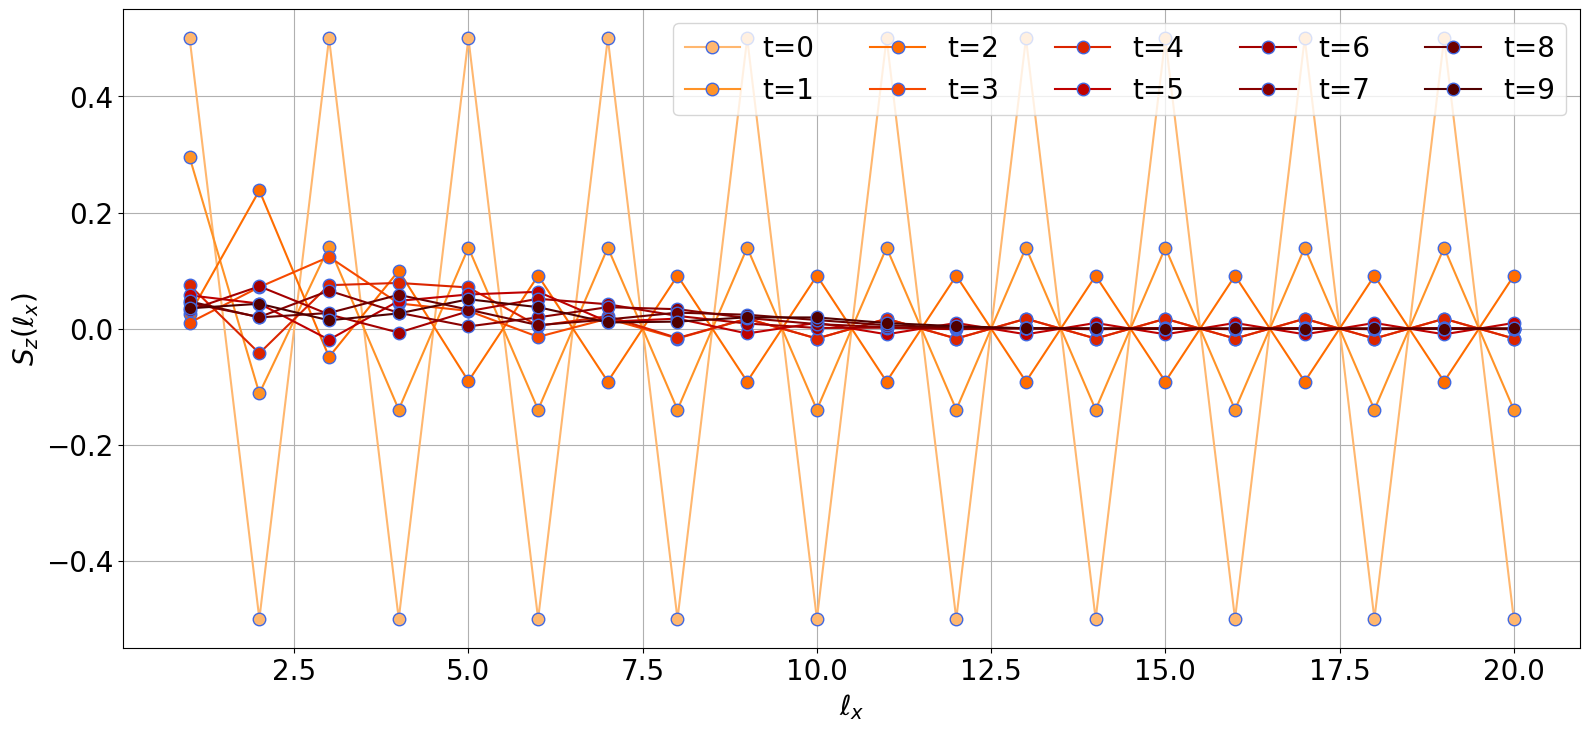

In [9]:
'''
    Analyze the real-time dynamics of the Heisenberg model
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
color = obtain_colors(15, cm.gist_heat_r)

ax = fig.add_subplot(spec[0, 0])
for index in range(final_time):
    ax.plot(np.arange(1, 21), Sz[index * 10, : 20].real, color = color[index + 2], marker = 'o', markersize = 9, \
            markeredgecolor = 'royalblue', label = r"t="+str(index))

ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$S_{z}(\ell_{x})$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

# plt.savefig(figures/Heisenberg_TEBD_Benchmark_N8_AFM_Initialization.pdf')

In [10]:
SvN = data_extrapolation("data/heisenberg_N200_T10.0_tau0.1.h5", "Entropy")

<KeysViewHDF5 ['Bond', 'Entropy', 'Overlap', 'Sz']>


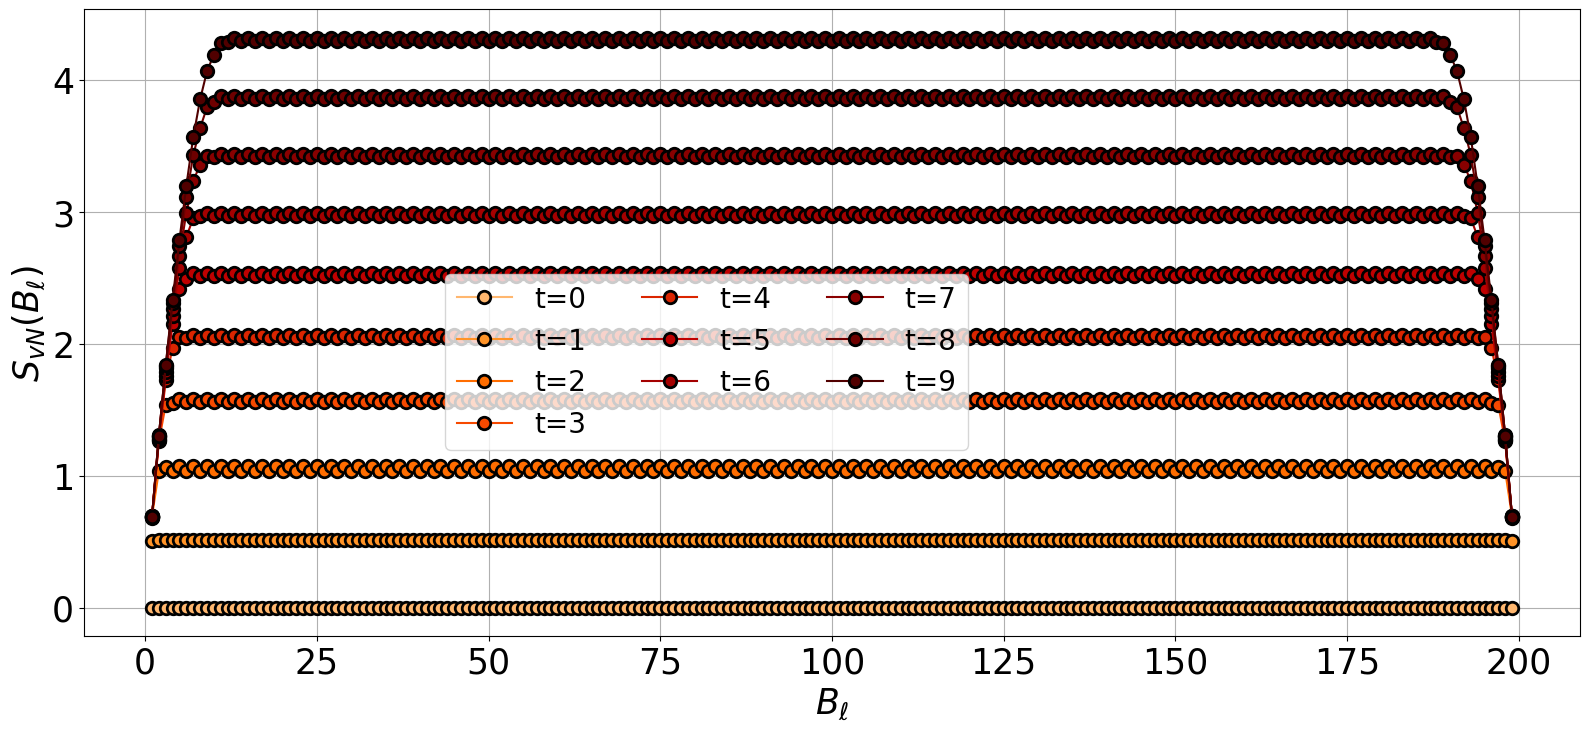

In [11]:
'''
    Plot time evolution of the von Neumann entanglement entropy
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])
for index in range(final_time):
    ax.plot(np.arange(1, 200), SvN[index * 10, :].real, color = color[index + 2], \
            marker = 'o', markersize = 9, markeredgewidth = 2, markeredgecolor = "black", linestyle = "-", label = r't='+str(index))
    
ax.set_xlabel(r'$B_{\ell}$', fontsize = 25)
ax.set_ylabel(r'$S_{vN}(B_{\ell})$', fontsize = 25)
ax.tick_params(axis = "both", which = "major", labelsize = 25) 
ax.legend(frameon = True, fontsize = 20, ncol = 3, bbox_to_anchor = [0.6, 0.6])
ax.grid()

# plt.savefig("Manuscript_Figures/SDKI_TEBD_Entanglement_N26.pdf")

In [12]:
chi = data_extrapolation("data/heisenberg_N200_T10.0_tau0.1.h5", "Bond")

<KeysViewHDF5 ['Bond', 'Entropy', 'Overlap', 'Sz']>


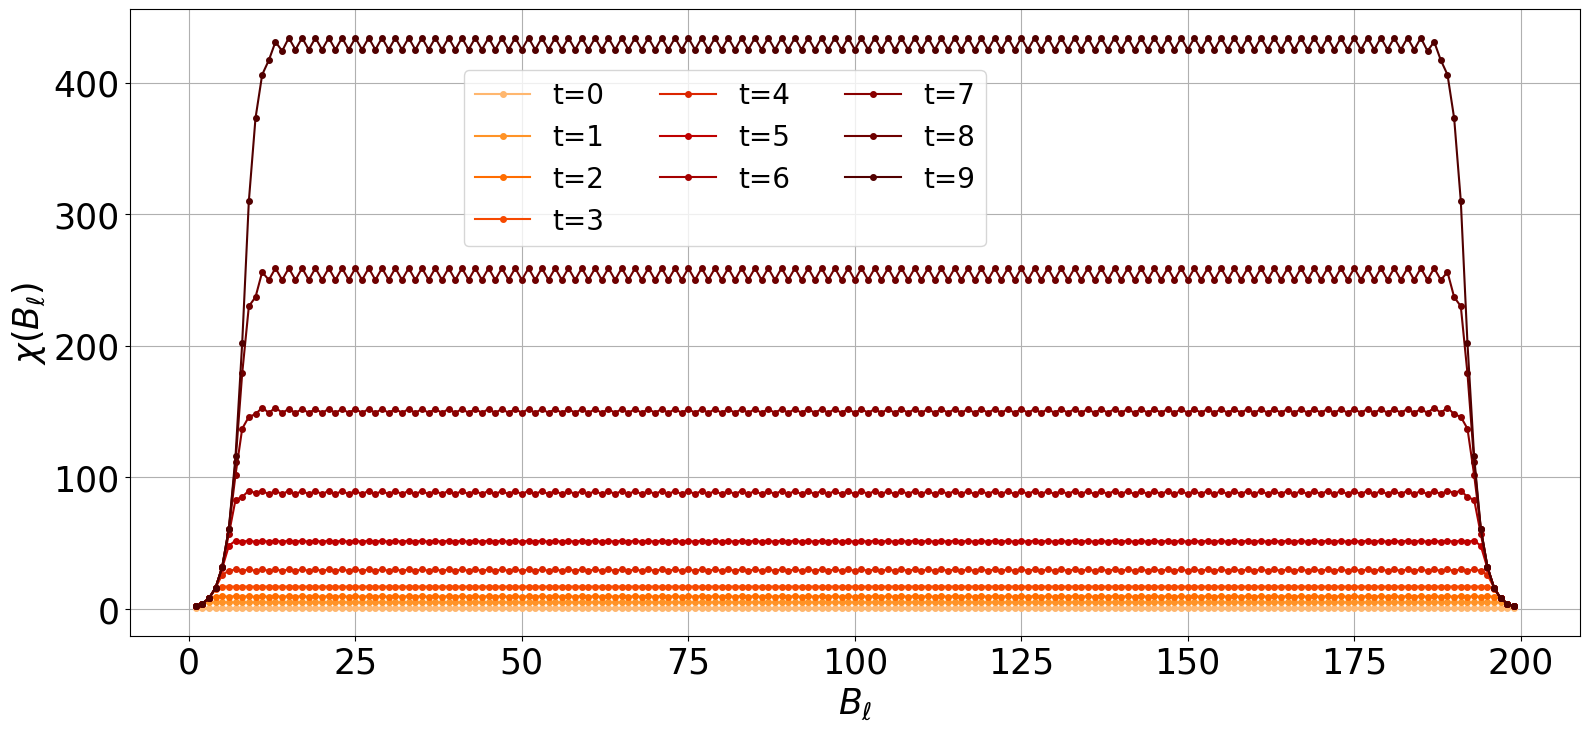

In [13]:
'''
    Plot time evolution of the bond dimension
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)

ax = fig.add_subplot(spec[0, 0])
for index in range(final_time):
    ax.plot(np.arange(1, 200), chi[index * 10, :].real, color = color[index + 2], \
            marker = 'o', markersize = 3, markeredgewidth = 2, linestyle = "-", label = r't='+str(index))
    
ax.set_xlabel(r'$B_{\ell}$', fontsize = 25)
ax.set_ylabel(r'$\chi(B_{\ell})$', fontsize = 25)
ax.tick_params(axis = "both", which = "major", labelsize = 25) 
ax.legend(frameon = True, fontsize = 20, ncol = 3, bbox_to_anchor = [0.6, 0.6])
ax.grid()

# plt.savefig("Manuscript_Figures/SDKI_TEBD_Entanglement_N26.pdf")

#### Analyze the ground state of the Heisenberg model

In [14]:
Sx0_T0 = data_extrapolation("data/heisenberg_ground_state.h5", "Sx0")
Sx_T0  = data_extrapolation("data/heisenberg_ground_state.h5", "Sx")

<KeysViewHDF5 ['Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>


In [15]:
Sz0_T0 = data_extrapolation("data/heisenberg_ground_state.h5", "Sz0")
Sz_T0  = data_extrapolation("data/heisenberg_ground_state.h5", "Sz")

<KeysViewHDF5 ['Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>


In [16]:
heisenberg_sites = 100

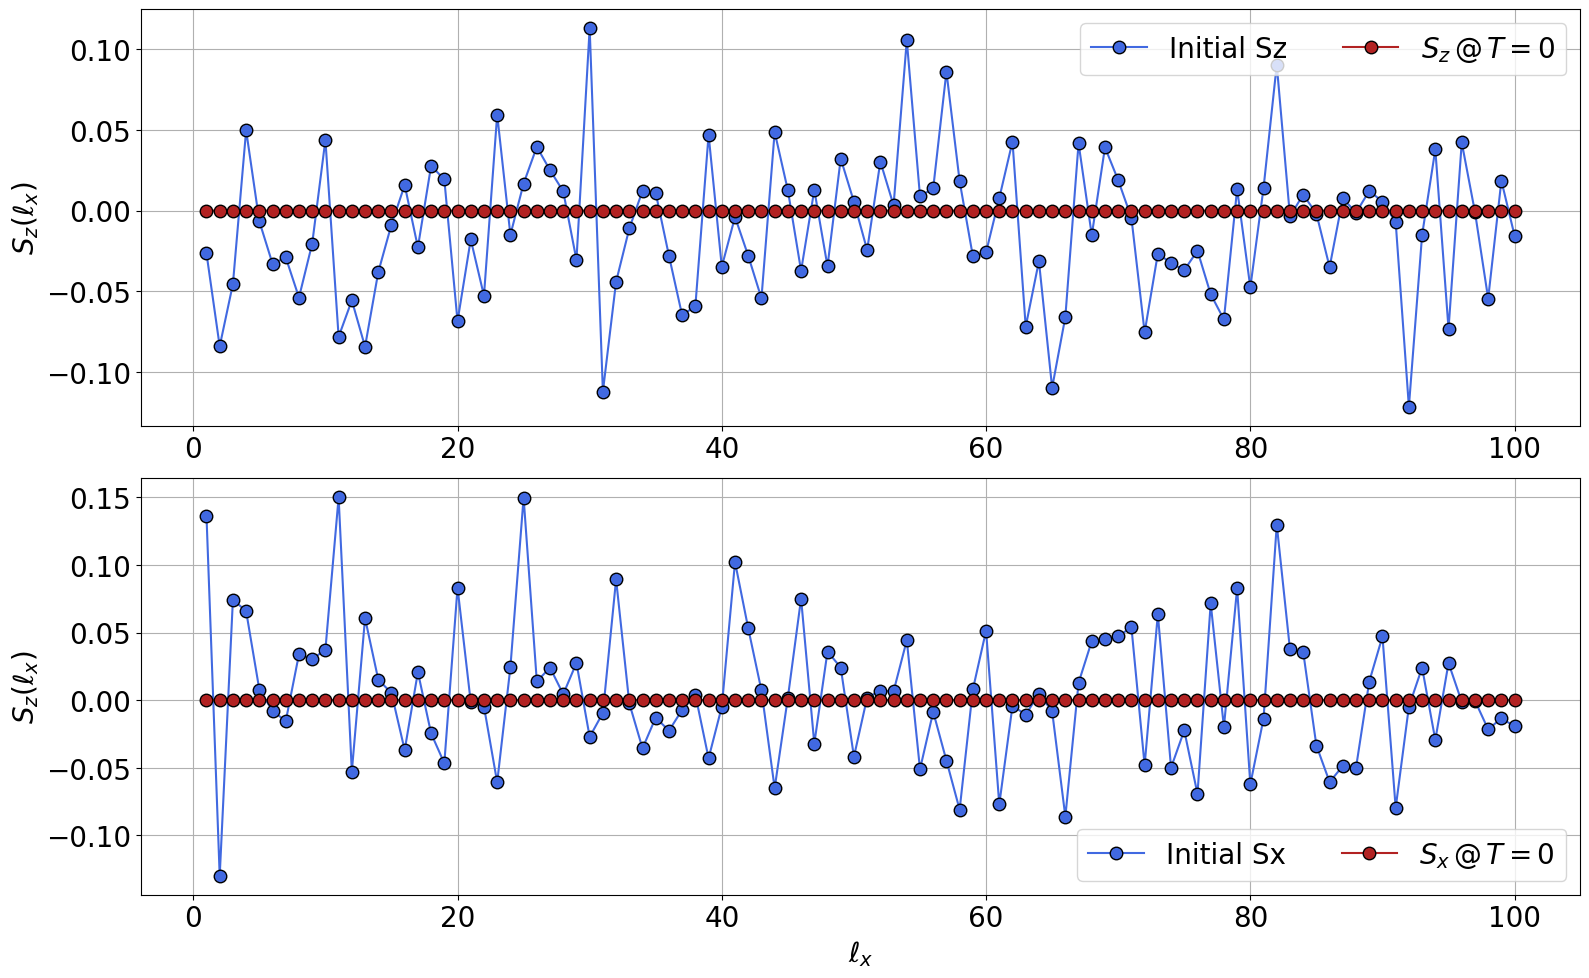

In [17]:
'''
    Analyze the ground-state properties of the Heisenberg model
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
color = obtain_colors(15, cm.gist_heat_r)

# Plot initial and final Sz
ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, heisenberg_sites + 1), Sz0_T0.real, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'Initial Sz')
ax.plot(np.arange(1, heisenberg_sites + 1), Sz_T0.real, color = "firebrick", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'$S_{z} \, @ \, T=0$')
    
# ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$S_{z}(\ell_{x})$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

# Plot initial and final Sz
ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, heisenberg_sites + 1), Sx0_T0.real, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'Initial Sx')
ax.plot(np.arange(1, heisenberg_sites + 1), Sx_T0.real, color = "firebrick", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'$S_{x} \, @ \, T=0$')
    
ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$S_{z}(\ell_{x})$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

# plt.savefig(figures/Heisenberg_TEBD_Benchmark_N8_AFM_Initialization.pdf')

#### Analyze the ground-state properties of the Heisenberg model with J1 and J2 terms

In [18]:
Sx0_T0 = data_extrapolation("data/heisenberg_J1J2_ground_state.h5", "Sx0")
Sx_T0  = data_extrapolation("data/heisenberg_J1J2_ground_state.h5", "Sx")

<KeysViewHDF5 ['Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>


In [19]:
Sz0_T0 = data_extrapolation("data/heisenberg_J1J2_ground_state.h5", "Sz0")
Sz_T0  = data_extrapolation("data/heisenberg_J1J2_ground_state.h5", "Sz")

<KeysViewHDF5 ['Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>


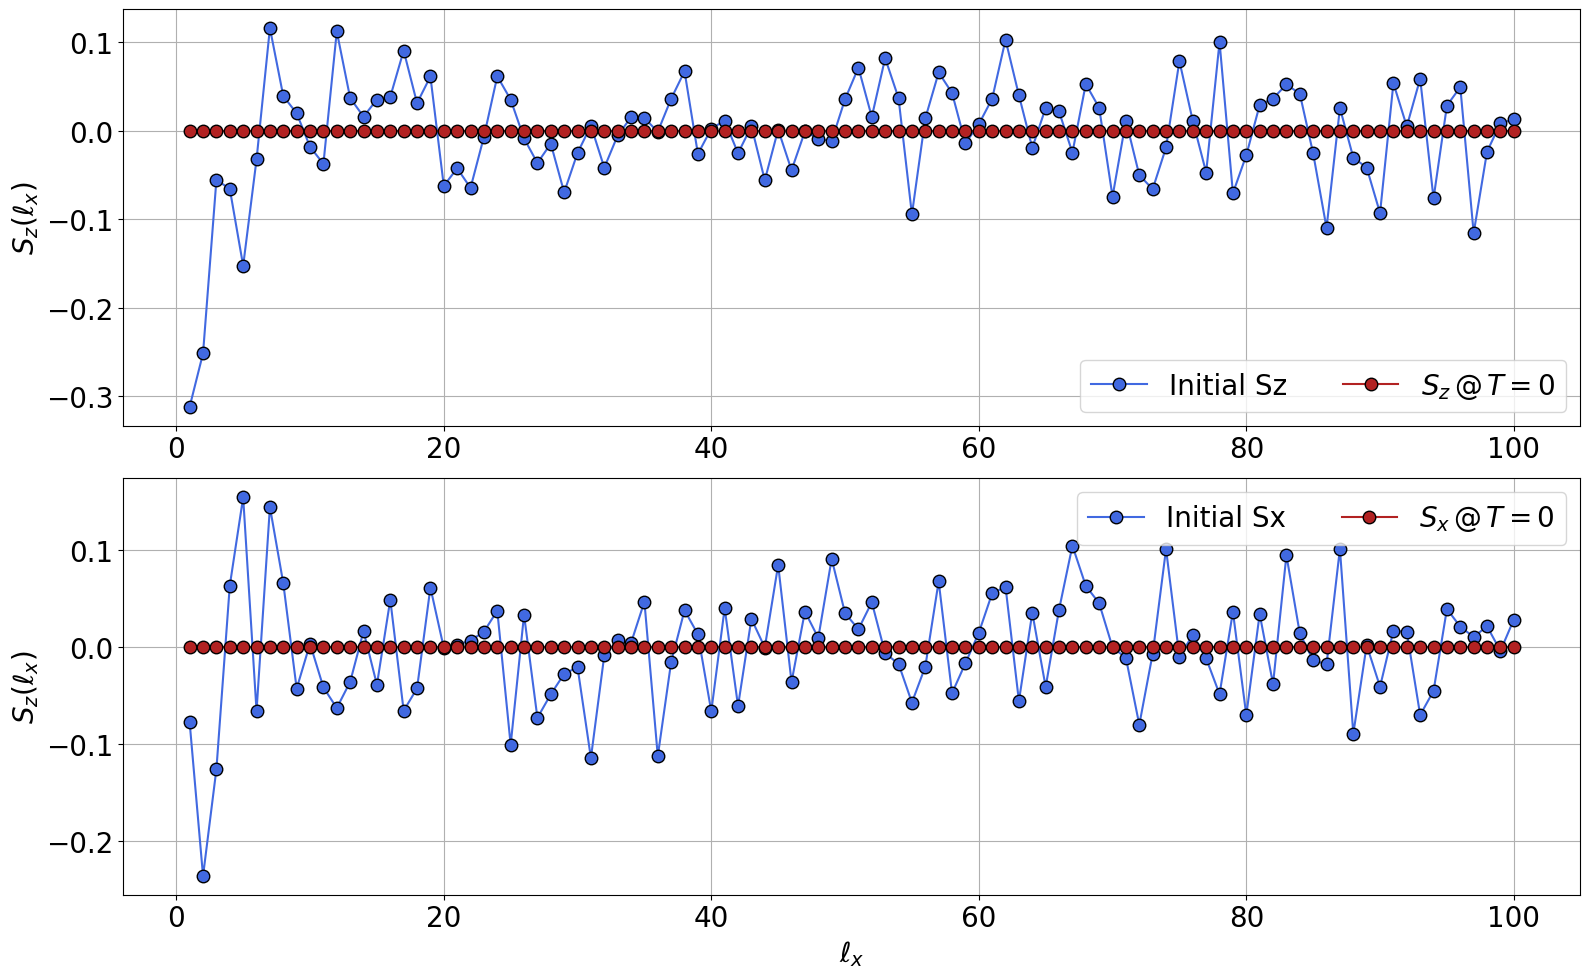

In [20]:
'''
    Analyze the ground-state properties of the Heisenberg model with J1 and J2 terms
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
color = obtain_colors(15, cm.gist_heat_r)

# Plot initial and final Sz
ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, heisenberg_sites + 1), Sz0_T0.real, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'Initial Sz')
ax.plot(np.arange(1, heisenberg_sites + 1), Sz_T0.real, color = "firebrick", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'$S_{z} \, @ \, T=0$')
    
# ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$S_{z}(\ell_{x})$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

# Plot initial and final Sz
ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, heisenberg_sites + 1), Sx0_T0.real, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'Initial Sx')
ax.plot(np.arange(1, heisenberg_sites + 1), Sx_T0.real, color = "firebrick", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'$S_{x} \, @ \, T=0$')
    
ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$S_{z}(\ell_{x})$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

# plt.savefig(figures/Heisenberg_TEBD_Benchmark_N8_AFM_Initialization.pdf')

##### BENCHMARK THE HEISENBERG MODEL IN TWO DIMENSIONS ON A SQUARE LATTICE

In [19]:
'''
    Extrapolate the spin correlation function Czz
        lx -> x coordinate of the reference point
        ly -> y coordinate of the reference point
        Nx -> length of the cylindr
        Ny -> width of the cylinder
        input_matrix -> input correlation matrix
'''

def obtain_correlation(lx: int, ly: int, tmp_Nx: int, tmp_Ny:int, input_matrix):
    Czz_tmp = []
    for index in range(tmp_Nx):
        Czz_tmp.append(input_matrix[(lx - 1) * tmp_Ny + ly - 1, index * tmp_Ny + ly - 1])
    Czz_tmp = np.array(Czz_tmp)
    return Czz_tmp

In [20]:
'''
    Add an extra phase factor to take the bipartite lattice into account
'''

def add_phase_factor(input_array):
    Czz_tmp = np.zeros(len(input_array))
    for index in range(len(input_array)):
        Czz_tmp[index] = input_array[index] * (-1)**index
    return abs(Czz_tmp)

In [21]:
Sz = data_extrapolation("data/2d_heisenberg_square_lattice_L16W4.h5", "Sz")

<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>


In [218]:
Nx = 16 
Ny = 4
N = Nx * Ny

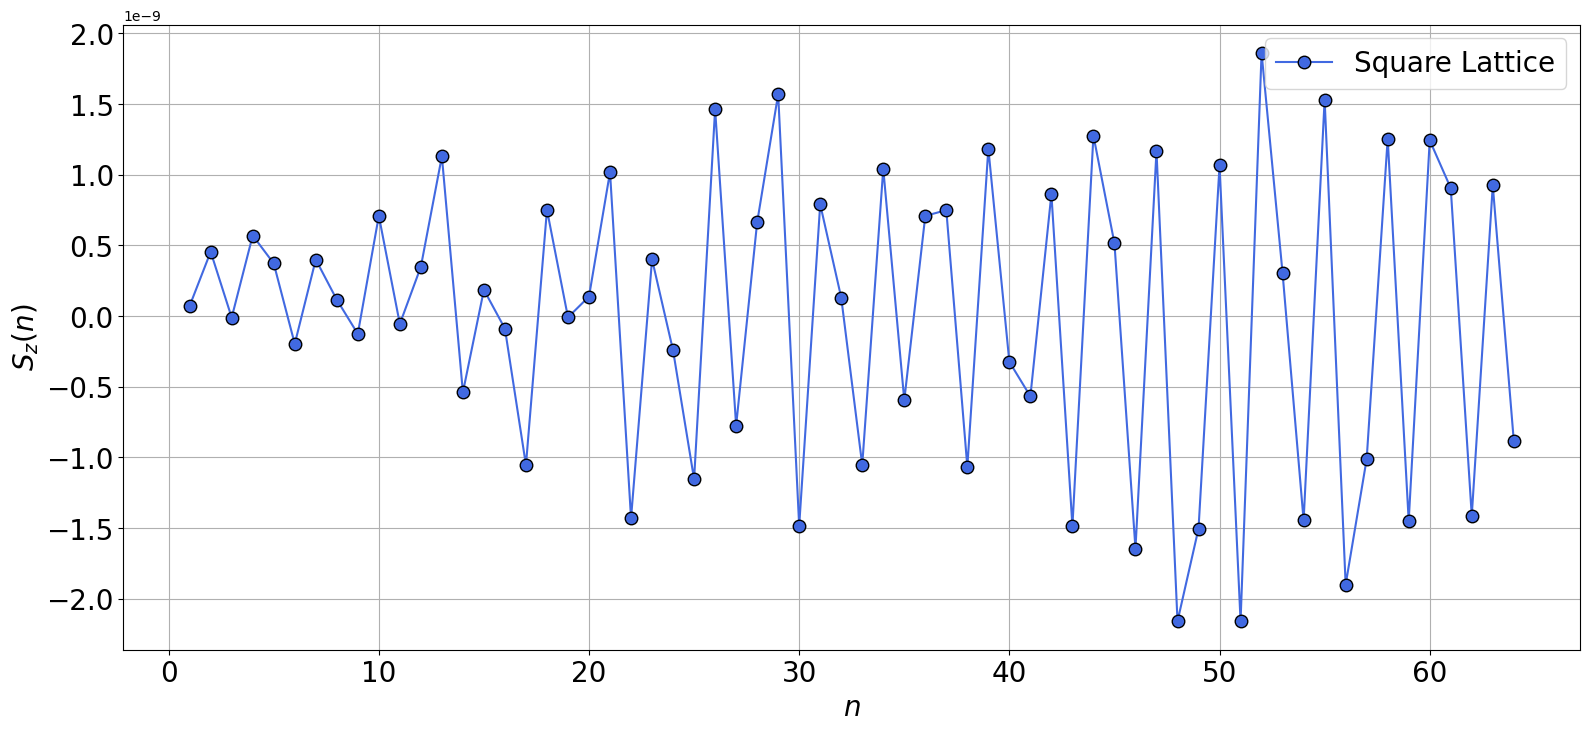

In [219]:
'''
    Analyze the Heisenberg model on a 2D square lattice & Plot the local observable Sz
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
color = obtain_colors(15, cm.gist_heat_r)

# Plot initial and final Sz
ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, N + 1), Sz.real, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'Square Lattice')
    
ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$S_{z}(n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

# plt.savefig(figures/Heisenberg_TEBD_Benchmark_N8_AFM_Initialization.pdf')

In [220]:
Czz = data_extrapolation("data/2d_heisenberg_square_lattice_L16W4.h5", "Czz")

<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>


In [221]:
Czz.shape

(64, 64)

In [222]:
C1_all = obtain_correlation(1, 1, Nx, Ny, Czz)

In [223]:
C1_all.shape

(16,)

In [224]:
C8_all = obtain_correlation(8, 1, Nx, Ny, Czz)

In [225]:
C8_all.shape

(16,)

In [226]:
# '''
#     Analyze the Heisenberg model on a 2D square lattice & Plot the spin correlation funciton Czz
# '''

# fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
# spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

# # Plot the original and staggered Czz
# ax = fig.add_subplot(spec[0, 0])
# C1_all_staggered = add_phase_factor(C1_all)

# ax.plot(np.arange(1, Nx + 1), C1_all, color = "royalblue", marker = 'o', markersize = 9, \
#         markeredgecolor = 'black', label = r'$\ell_{y}=1$')
# ax.plot(np.arange(1, Nx + 1), C1_all_staggered, color = "firebrick", marker = 's', markersize = 9, \
#         markerfacecolor = "none", label = r'Staggered')  

# # ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
# ax.set_ylabel(r'$C_{zz}(1, \ell_{x}^{\prime})$', fontsize = 20)    
# ax.tick_params(axis = "both", which = "major", labelsize = 20) 
# ax.legend(frameon = True, fontsize = 20, ncol = 5)
# ax.grid()  

# # Plot the original and staggered Czz
# ax = fig.add_subplot(spec[1, 0])
# C8_all_staggered = add_phase_factor(C8_all)

# ax.plot(np.arange(1, Nx + 1), C8_all, color = "royalblue", marker = 'o', markersize = 9, \
#         markeredgecolor = 'black', label = r'$\ell_{y}=1$')
# ax.plot(np.arange(1, Nx + 1), abs(C8_all_staggered), color = "firebrick", marker = 's', markersize = 9, \
#         markerfacecolor = "none", label = r'Staggered')
    
# ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
# ax.set_ylabel(r'$C_{zz}(8, \ell_{x}^{\prime})$', fontsize = 20)    
# ax.tick_params(axis = "both", which = "major", labelsize = 20) 
# ax.legend(frameon = True, fontsize = 20, ncol = 5)
# ax.grid()  

# # plt.savefig("figures/2d_heisenberg_square_lattice_Czz_L16W4.pdf")

In [227]:
marker = ["o", ">", "s", "D"]
label = [r"$\ell_{y}=1$", r"$\ell_{y}=2$", r"$\ell_{y}=3$", r"$\ell_{y}=4$"]

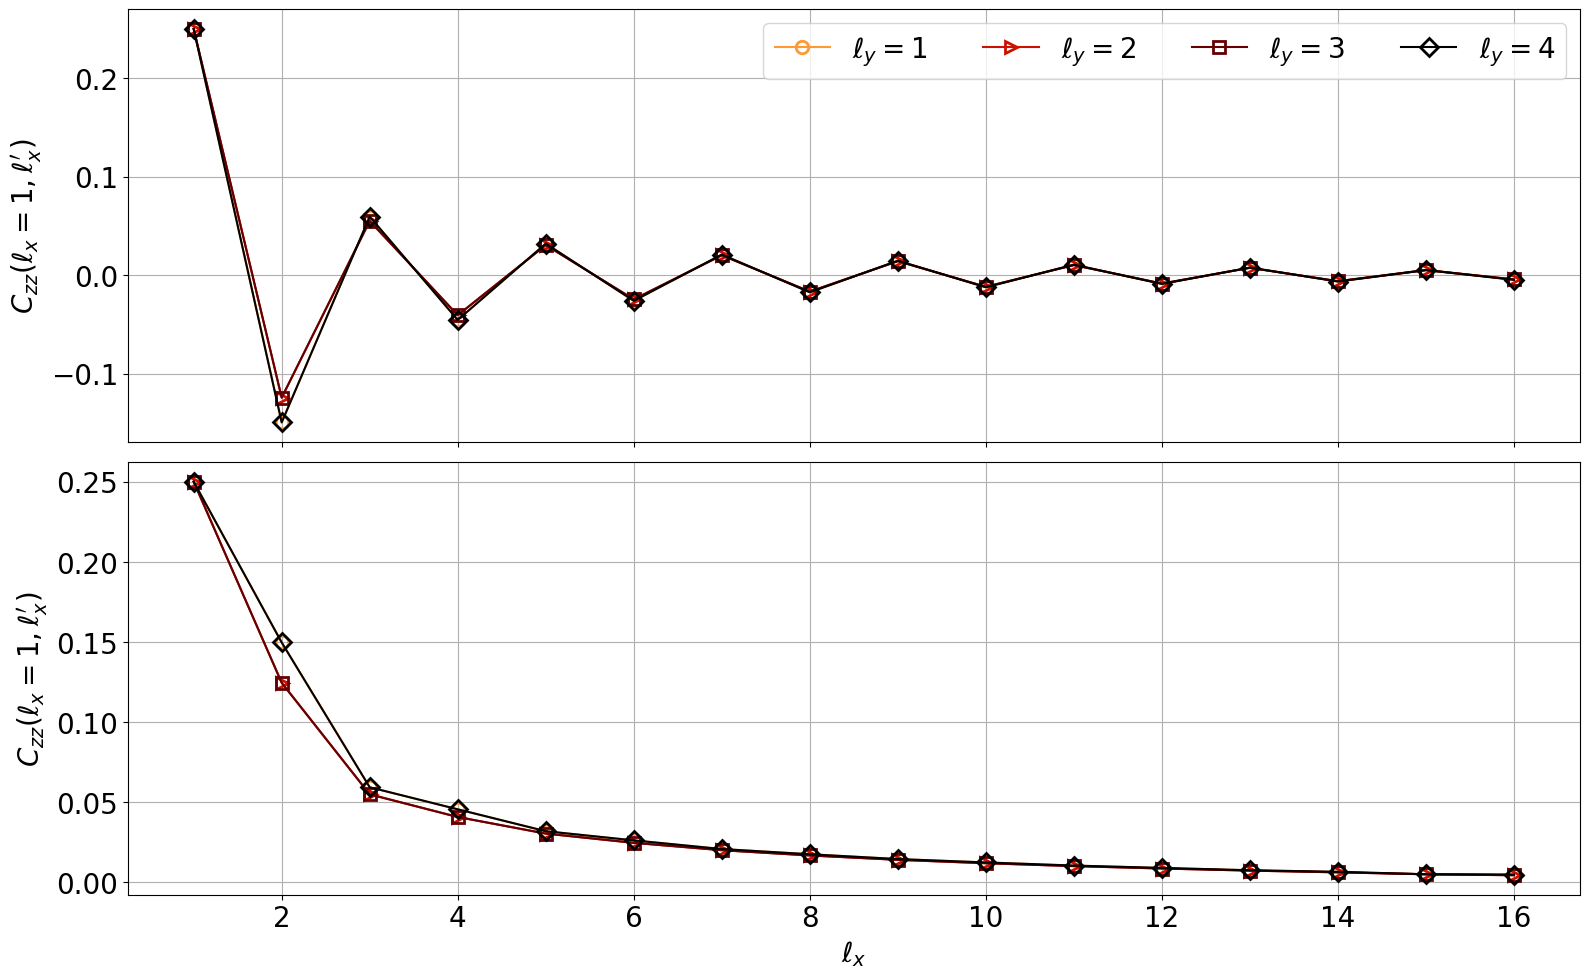

In [233]:
'''
    Analyze the Heisenberg model on a 2D square lattice && Plot the spin correlation function
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
color = obtain_colors(16, cm.gist_heat_r)

# Plot the original and staggered Czz
ax = fig.add_subplot(spec[0, 0])
for index in range(Ny):
    Czz_all = obtain_correlation(1, index + 1, Nx, Ny, Czz)

    ax.plot(np.arange(1, Nx + 1), Czz_all, color = color[4 * index + 3], marker = marker[index], markersize = 9, \
            markerfacecolor = "none", markeredgewidth = 2, label = label[index])
ax.set_xticklabels([])
ax.set_ylabel(r'$C_{zz}(\ell_{x} = 1, \ell_{x}^{\prime})$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  
    
ax = fig.add_subplot(spec[1, 0])
for index in range(Ny):
    Czz_all = obtain_correlation(1, index + 1, Nx, Ny, Czz)
    Czz_all_staggered = add_phase_factor(Czz_all)

    ax.plot(np.arange(1, Nx + 1), Czz_all_staggered, color = color[4 * index + 3], marker = marker[index], markersize = 9, \
            markerfacecolor = "none", markeredgewidth = 2, label = label[index])  

ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(\ell_{x} = 1, \ell_{x}^{\prime})$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.grid()  

plt.savefig("figures/2d_heisenberg_square_lattice_Czz_rows_L16W4.pdf")

In [234]:
Nx_List = [16, 24, 32, 48, 64, 80, 128]
File_List = ["data/2d_heisenberg_square_lattice_pbc_L16W4.h5", \
             "data/2d_heisenberg_square_lattice_pbc_L24W4.h5", \
             "data/2d_heisenberg_square_lattice_pbc_L32W4.h5", \
             "data/2d_heisenberg_square_lattice_pbc_L48W4.h5", \
             "data/2d_heisenberg_square_lattice_pbc_L64W4.h5", \
             "data/2d_heisenberg_square_lattice_pbc_L80W4.h5", \
             "data/2d_heisenberg_square_lattice_pbc_L128W4.h5"]
# symbol = ["o", ">", "<", "s", "D"]
label = [r"$N_{x}=16$", r"$N_{x}=24$", r"$N_{x}=32$", \
         r"$N_{x}=48$", r"$N_{x}=64$", r"$N_{x}=80$", \
         r"$N_{x}=128$"]

<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
[0.25       0.1183434  0.05332766 0.03881484 0.02840639 0.02235654
 0.01759791 0.01421905 0.01149432 0.00940987 0.00770345 0.00634091
 0.00520005 0.00426262 0.00336888 0.00283913]
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
[0.25       0.11834318 0.05332862 0.03881687 0.0284107  0.02236369
 0.01760969 0.01423717 0.01152137 0.00945027 0.00776283 0.00642667
 0.00532751 0.004437   0.0036986  0.0030913  0.00258429 0.00216224
 0.00180692 0.00150744 0.00125106 0.00103309 0.00082134 0.00069381]
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
[2.50000000e-01 1.18343168e-01 5.33286650e-02 3.88169603e-02
 2.84108794e-02 2.23640206e-02 1.76101971e-02 1.42379142e-02
 1.15224842e-02 9.45186096e-03 7.76506576e-03 6.42978204e-03
 5.33160990e-03 4.44254744e-03 3.70632174e-03 3.10179416e-03
 2.59835341e-03 2.18099012e-03 1.83189294e-03 1.54056719e-03
 1.29604877e-03 1.09102714e-03 9.18429854e-04 7.73152296e-04
 6.50493528e-04 5.46814823e-04 4.58789

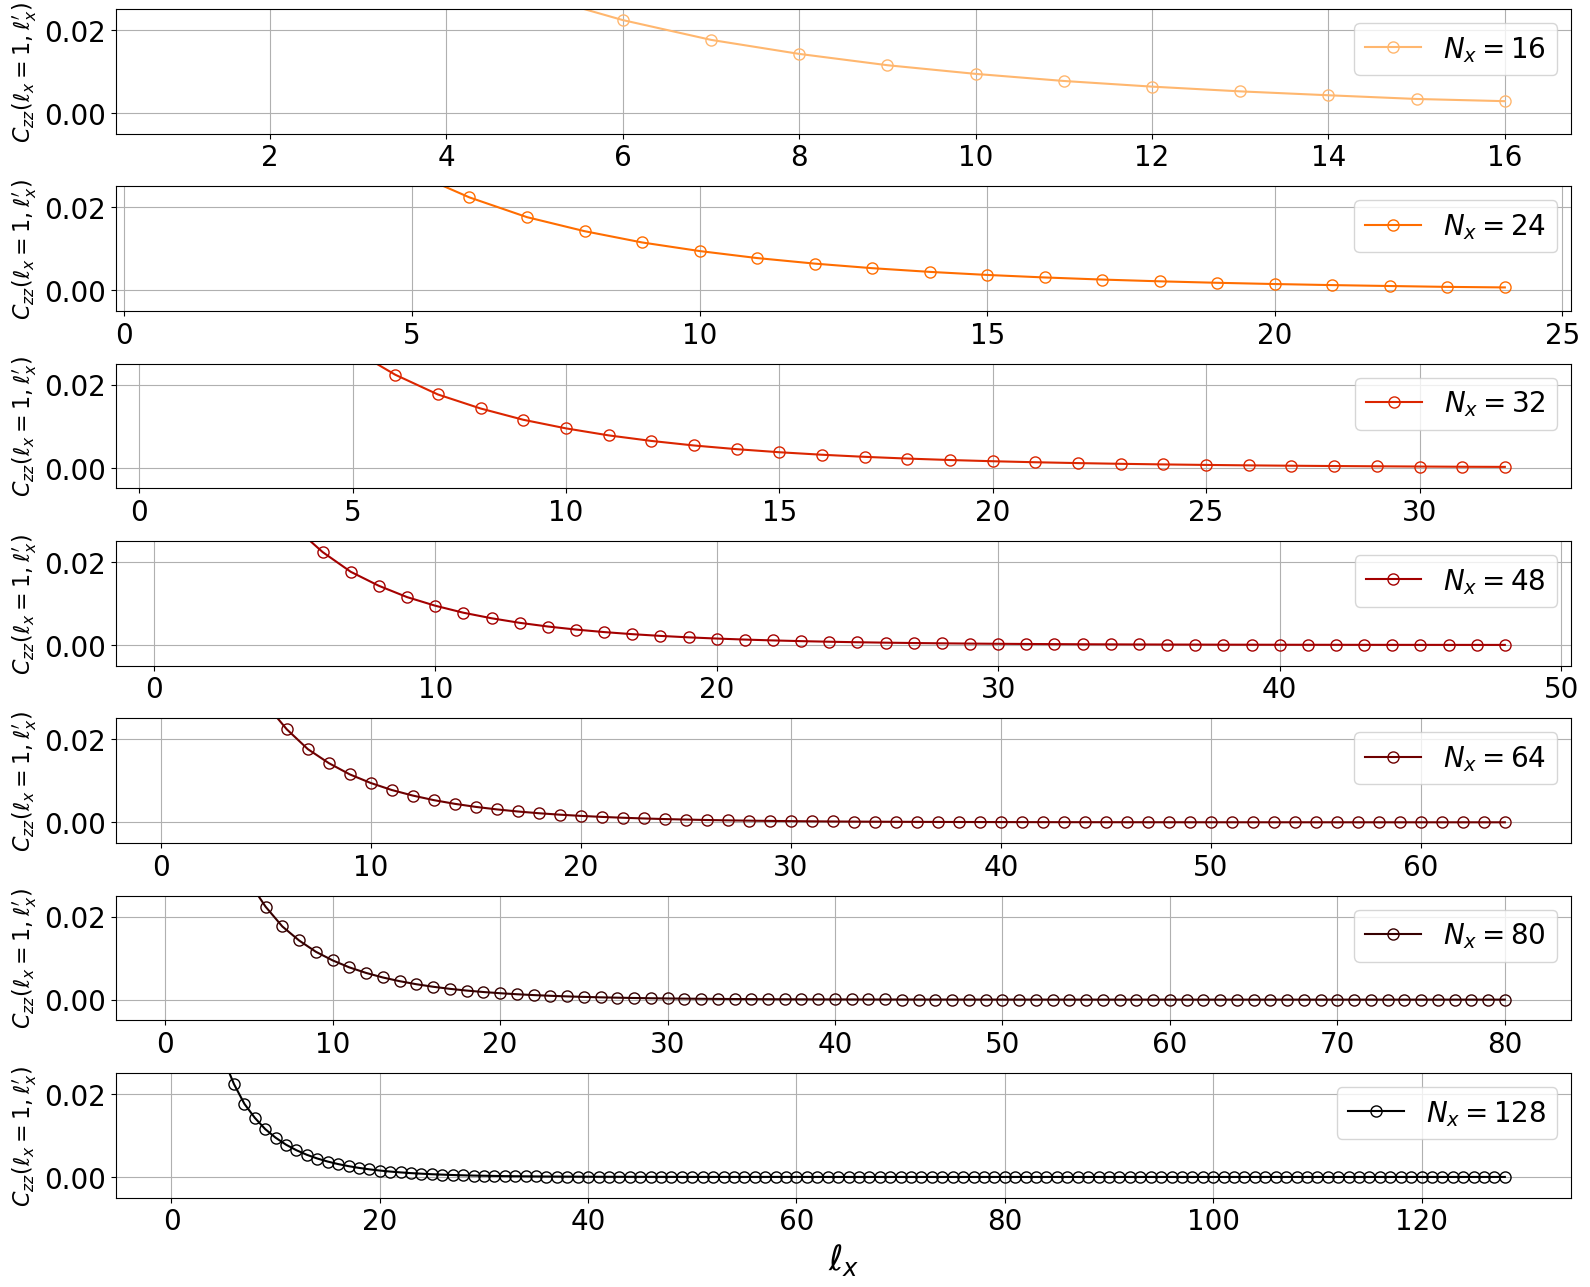

In [235]:
'''
    Analyze the length dependence of Czz for the Heisenberg model in the ground state
'''

fig = plt.figure(figsize = (16, 21 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 7, ncols = 1, figure = fig)
color = obtain_colors(15, cm.gist_heat_r)

# Plot the original and staggered Czz
for length_index, Nx in enumerate(Nx_List):
    ax = fig.add_subplot(spec[length_index, 0])
    Czz = data_extrapolation(File_List[length_index], "Czz")
    C1_all = obtain_correlation(1, 1, Nx, Ny, Czz)
    C1_all = add_phase_factor(C1_all)
    print(C1_all)
    
    ax.plot(np.arange(1, Nx + 1), abs(C1_all), color = color[2 * length_index + 2], marker = "o", markersize = 8, \
            markerfacecolor = "none", label = label[length_index])
    
    if length_index == len(Nx_List) - 1:
        ax.set_xlabel(r'$\ell_{x}$', fontsize = 25)
    # else:
    #     ax.set_xticklabels([])
        
    ax.set_ylabel(r'$C_{zz}(\ell_{x}=1, \ell_{x}^{\prime})$', fontsize = 16)   
    ax.set_ylim(-0.005, 0.025)
    ax.tick_params(axis = "both", which = "major", labelsize = 20) 
    ax.legend(frameon = True, fontsize = 20, ncol = 1)
    ax.grid()  

plt.savefig("figures/2d_heisenberg_square_lattice_Czz_PBC_W4.pdf")

##### BENCHMARK THE HEISENBERG MODEL WITH PINNING FIELDS ON THE LEFT EDGE

In [180]:
'''
    Extrapolate local observable Sz along a specific cut
    ly -> the number of the selected row
    Nx -> length of the cylinder
    Ny -> width of the cylinder
'''

def obtain_Sz(ly: int, tmp_Nx: int, tmp_Ny: int, input_array):
    Sz_tmp = []
    for index in range(tmp_Nx):
        Sz_tmp.append(input_array[index * tmp_Ny + ly - 1])
    Sz_tmp = np.array(Sz_tmp)
    return Sz_tmp

In [242]:
Nx_List = [16, 32, 64]
File_List_p02 = ["data/2d_heisenberg_square_lattice_pinning_L16W4.h5", \
                 "data/2d_heisenberg_square_lattice_pinning_L32W4.h5", \
                 "data/2d_heisenberg_square_lattice_pinning_L64W4.h5" ]
File_List_p05 = ["data/2d_heisenberg_square_lattice_pinning_p05_L16W4.h5", \
                 "data/2d_heisenberg_square_lattice_pinning_p05_L32W4.h5", \
                 "data/2d_heisenberg_square_lattice_pinning_p05_L64W4.h5" ]
marker = ["o", "s", "D"]
label = [r"$N_{x}=16$", r"$N_{x}=32$", r"$N_{x}=64$"]

In [243]:
# '''
#     Analyze the length dependence of Czz for the Heisenberg model in the ground state
# '''

# fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
# spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
# color = obtain_colors(15, cm.gist_heat_r)

# # Plot the original and staggered Czz
# ax = fig.add_subplot(spec[0, 0])
# for length_index, Nx in enumerate(Nx_List):
#     Sz = data_extrapolation(File_List_p02[length_index], "Sz")
#     Sz_row = obtain_Sz(1, Nx, 4, Sz)
#     Sz_staggered = add_phase_factor(Sz_row)
    
#     ax.plot(np.arange(1, Nx + 1), Sz_staggered, color = color[2 * length_index + 2], marker = marker[length_index], markersize = 6, \
#             markerfacecolor = "none", label = label[length_index])

# # ax.set_xticklabels([])
# ax.set_xlabel(r"$\ell_{x}$", fontsize = 20)
# ax.set_ylabel(r"$S_{z}(\ell_{x}, \ell_{y} = 1)$", fontsize = 20)  
# ax.tick_params(axis = "both", which = "major", labelsize = 20) 
# ax.legend(frameon = True, fontsize = 20, ncol = 1)
# ax.grid()  

# ax = fig.add_subplot(spec[1, 0])
# for length_index, Nx in enumerate(Nx_List):
#     Sz = data_extrapolation(File_List_p05[length_index], "Sz")
#     Sz_row = obtain_Sz(1, Nx, 4, Sz)
#     Sz_staggered = add_phase_factor(Sz_row)
    
#     ax.plot(np.arange(1, Nx + 1), Sz_staggered, color = color[2 * length_index + 2], marker = marker[length_index], markersize = 6, \
#             markerfacecolor = "none", label = label[length_index])
    
# ax.set_xlabel(r"$\ell_{x}$", fontsize = 20)
# ax.set_ylabel(r"$S_{z}(\ell_{x}, \ell_{y} = 1)$", fontsize = 20)   
# ax.tick_params(axis = "both", which = "major", labelsize = 20) 
# # ax.legend(frameon = True, fontsize = 20, ncol = 1)
# ax.grid()  

# # plt.savefig("figures/2d_heisenberg_square_lattice_Sz_Pinning_W4.pdf")

<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>


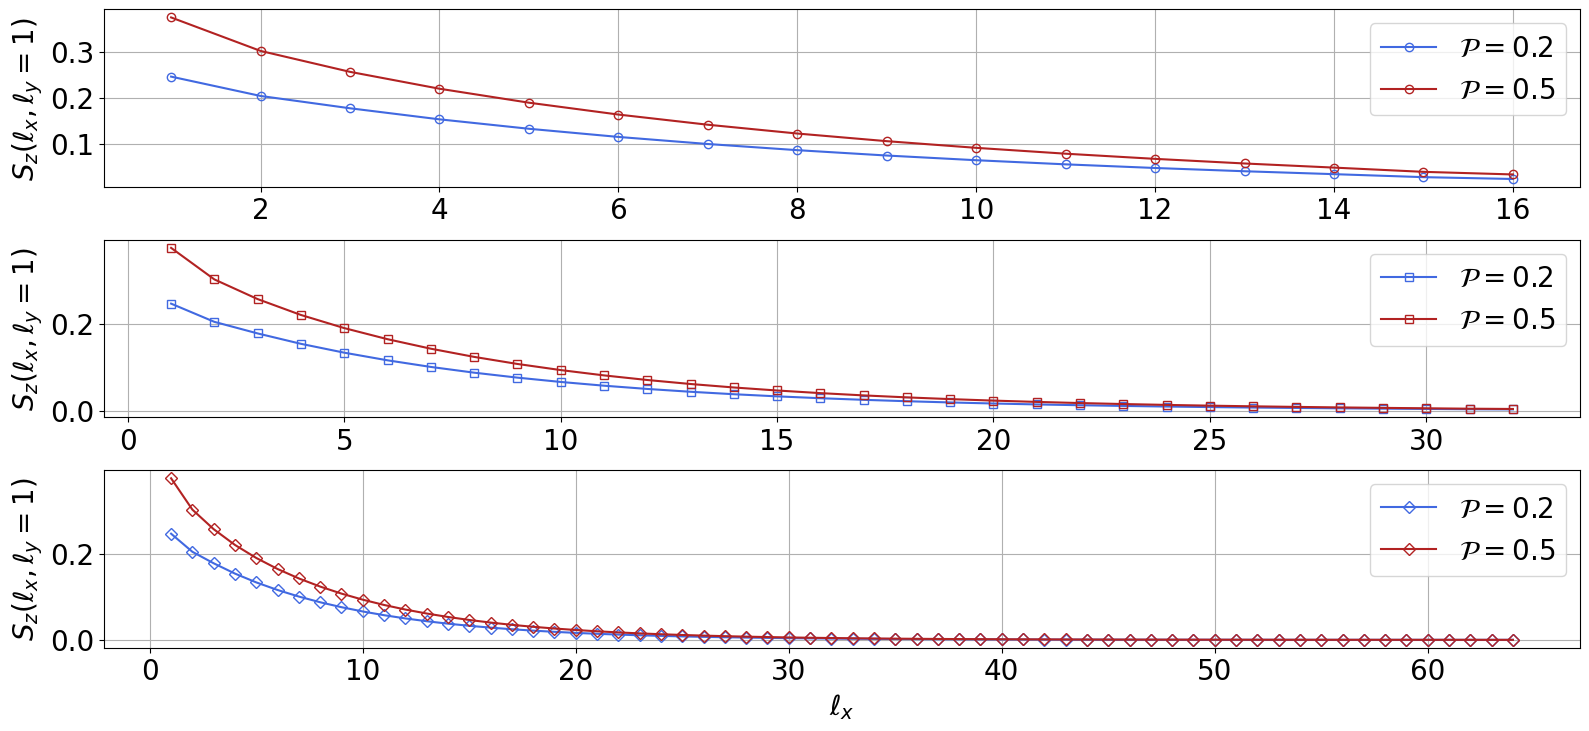

In [249]:
'''
    Analyze the length dependence of Czz for the Heisenberg model in the ground state
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)
color = obtain_colors(15, cm.gist_heat_r)

# Plot the original and staggered Czz
for length_index, Nx in enumerate(Nx_List):
    ax = fig.add_subplot(spec[length_index, 0])
    
    Sz = data_extrapolation(File_List_p02[length_index], "Sz")
    Sz_row = obtain_Sz(1, Nx, 4, Sz)
    Sz_staggered = add_phase_factor(Sz_row)
    ax.plot(np.arange(1, Nx + 1), Sz_staggered, color = "royalblue", marker = marker[length_index], markersize = 6, \
            markerfacecolor = "none", label = r"$\mathcal{P}=0.2$")
    
    Sz = data_extrapolation(File_List_p05[length_index], "Sz")
    Sz_row = obtain_Sz(1, Nx, 4, Sz)
    Sz_staggered = add_phase_factor(Sz_row)
    
    ax.plot(np.arange(1, Nx + 1), Sz_staggered, color = "firebrick", marker = marker[length_index], markersize = 6, \
            markerfacecolor = "none", label = r"$\mathcal{P}=0.5$")
    
    if length_index == len(Nx_List) - 1:
        ax.set_xlabel(r"$\ell_{x}$", fontsize = 20)
    ax.set_ylabel(r"$S_{z}(\ell_{x}, \ell_{y} = 1)$", fontsize = 20)  
    ax.tick_params(axis = "both", which = "major", labelsize = 20) 
    ax.legend(frameon = True, fontsize = 20, ncol = 1)
    ax.grid()  

plt.savefig("figures/2d_heisenberg_square_lattice_Sz_Pinning_W4.pdf")

In [160]:
# '''
#     Analyze the length dependence of Czz for the Heisenberg model in the ground state
# '''

# fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
# spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
# color = obtain_colors(15, cm.gist_heat)

# # Plot the original and staggered Czz
# ax = fig.add_subplot(spec[0, 0])
# for length_index, Nx in enumerate(Nx_List):
#     Czz = data_extrapolation(File_List[length_index], "Czz")
#     C1_all = []
#     for index in range(Nx):
#         C1_all.append(Czz[0, 4 * index])
#     C1_all = np.array(C1_all)
#     C1_all = add_phase_factor(C1_all)
#     print(C1_all)
    
#     ax.plot(np.arange(1, Nx + 1), abs(C1_all), color = color[2 * length_index + 2], marker = symbol[length_index], markersize = 8, \
#             markerfacecolor = "none", label = label[length_index])
    
# ax.set_xlabel(r'$\ell_{x}$', fontsize = 25)
# ax.set_ylabel(r'$C_{zz}(1, \ell_{x}^{\prime})|_{\ell_{y}=1}$', fontsize = 20)    
# ax.tick_params(axis = "both", which = "major", labelsize = 20) 
# ax.legend(frameon = True, fontsize = 20, ncol = 1)
# ax.grid()  

# # plt.savefig("figures/2d_heisenberg_square_lattice_Czz_W4.pdf")

In [189]:
Nx_List = [8, 16, 24, 32, 48]
sites = 1.0 / np.array(Nx_List)
File_List = ["data/2d_heisenberg_square_lattice_L8W4.h5",  "data/2d_heisenberg_square_lattice_L16W4.h5", \
             "data/2d_heisenberg_square_lattice_L24W4.h5", "data/2d_heisenberg_square_lattice_L32W4.h5", \
             "data/2d_heisenberg_square_lattice_L48W4.h5"]

In [190]:
import warnings

E0 = []
for length_index, Nx in enumerate(Nx_List):
    E0.append(data_extrapolation(File_List[length_index], "E0")) 
print(E0)

<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Sz', 'Sz0', 'psi']>
[array(-0.36684208), array(-0.35989869), array(-0.3577022), array(-0.3566241), array(-0.35555903)]


In [191]:
coeff = np.polyfit(sites, E0, 2)
coeff

array([-0.06645   , -0.09861606, -0.35347667])

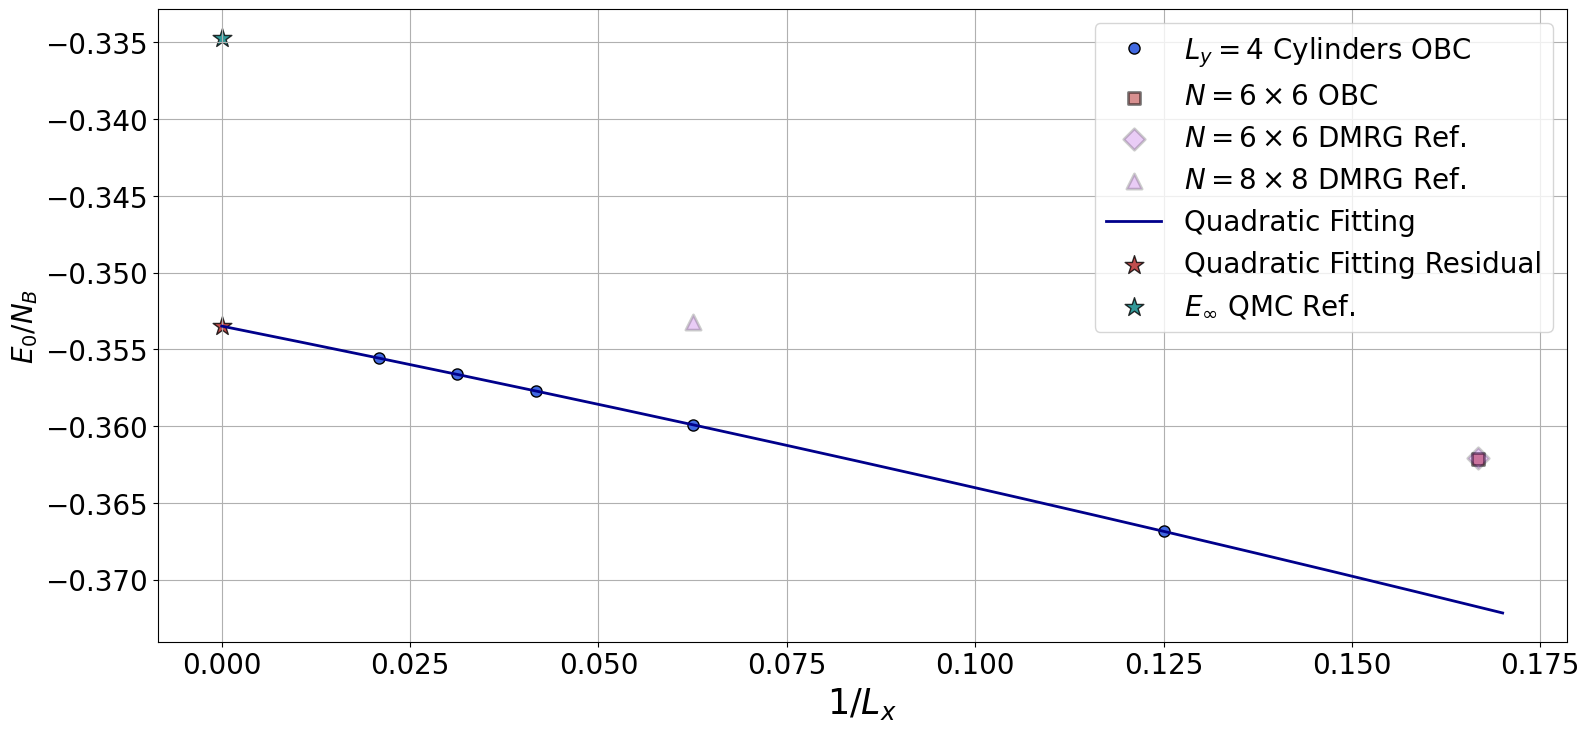

In [203]:
'''
    Extrapolate the ground state energy to the thermodynamic limit
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
color = obtain_colors(15, cm.gist_heat)

# Plot the original and staggered Czz
ax = fig.add_subplot(spec[0, 0])

ax.plot(sites, E0, linestyle = " ", color = "royalblue", marker = "o", markersize = 8, \
        markeredgecolor = "black", label = r"$L_{y}=4$ Cylinders OBC")
ax.scatter(1.0 / 6, -0.36211289957276876, color = "firebrick", marker = "s", \
           s = 80, alpha = 0.5, edgecolor = "black", linewidth = 2, label = r"$N = 6 \times 6$ OBC")
ax.scatter(1.0 / 6, -0.362096, color = "darkviolet", marker = "D", \
           s = 120, alpha = 0.2, edgecolor = "black", linewidth = 2, label = r"$N = 6 \times 6$ DMRG Ref.")
ax.scatter(1.0 / 16, -0.353213, color = "darkviolet", marker = "^", \
           s = 120, alpha = 0.2, edgecolor = "black", linewidth = 2, label = r"$N = 8 \times 8$ DMRG Ref.")

x_to_plot = np.linspace(0, 0.17, 10000)
y_to_plot = coeff[0] * x_to_plot**2 + coeff[1] * x_to_plot + coeff[2]
ax.plot(x_to_plot, y_to_plot, color = "darkblue", linewidth = 2, label = r"Quadratic Fitting")
ax.scatter(0, coeff[2], color = "firebrick", marker = "*", \
           s = 200, alpha = 0.8, edgecolor = "black", linewidth = 1, label = r"Quadratic Fitting Residual")
ax.scatter(0, -0.334719, color = "teal", marker = "*", \
           s = 200, alpha = 0.8, edgecolor = "black", linewidth = 1, label = r"$E_{\infty}$ QMC Ref.")

ax.set_xlabel(r'$1 / L_{x}$', fontsize = 25)
ax.set_ylabel(r'$E_{0} / N_{B}$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

plt.savefig("figures/2d_heisenberg_square_lattice_energy_per_bond_extrapolation.pdf")

##### BENCHMARK THE HEISENBERG MODEL ON A HONEYCOMB LATTICE

In [28]:
nsweeps = 10
Nbond = [20, 48, 92]
marker = ["o", "s", "D"]
label = [r"$N = 4 \times 4$", r"$N = 6 \times 6$", r"$N = 16 \times 4$"]

rings = ["data/2d_heisenberg_honeycomb_lattice_rings_L4W4.h5", \
         "data/2d_heisenberg_honeycomb_lattice_rings_L6W6.h5", \
         "data/2d_heisenberg_honeycomb_lattice_rings_L16W4.h5"]

cstyle = ["data/2d_heisenberg_honeycomb_lattice_cstyle_L4W4.h5", \
          "data/2d_heisenberg_honeycomb_lattice_cstyle_L6W6.h5", \
          "data/2d_heisenberg_honeycomb_lattice_cstyle_L16W4.h5"]

<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>


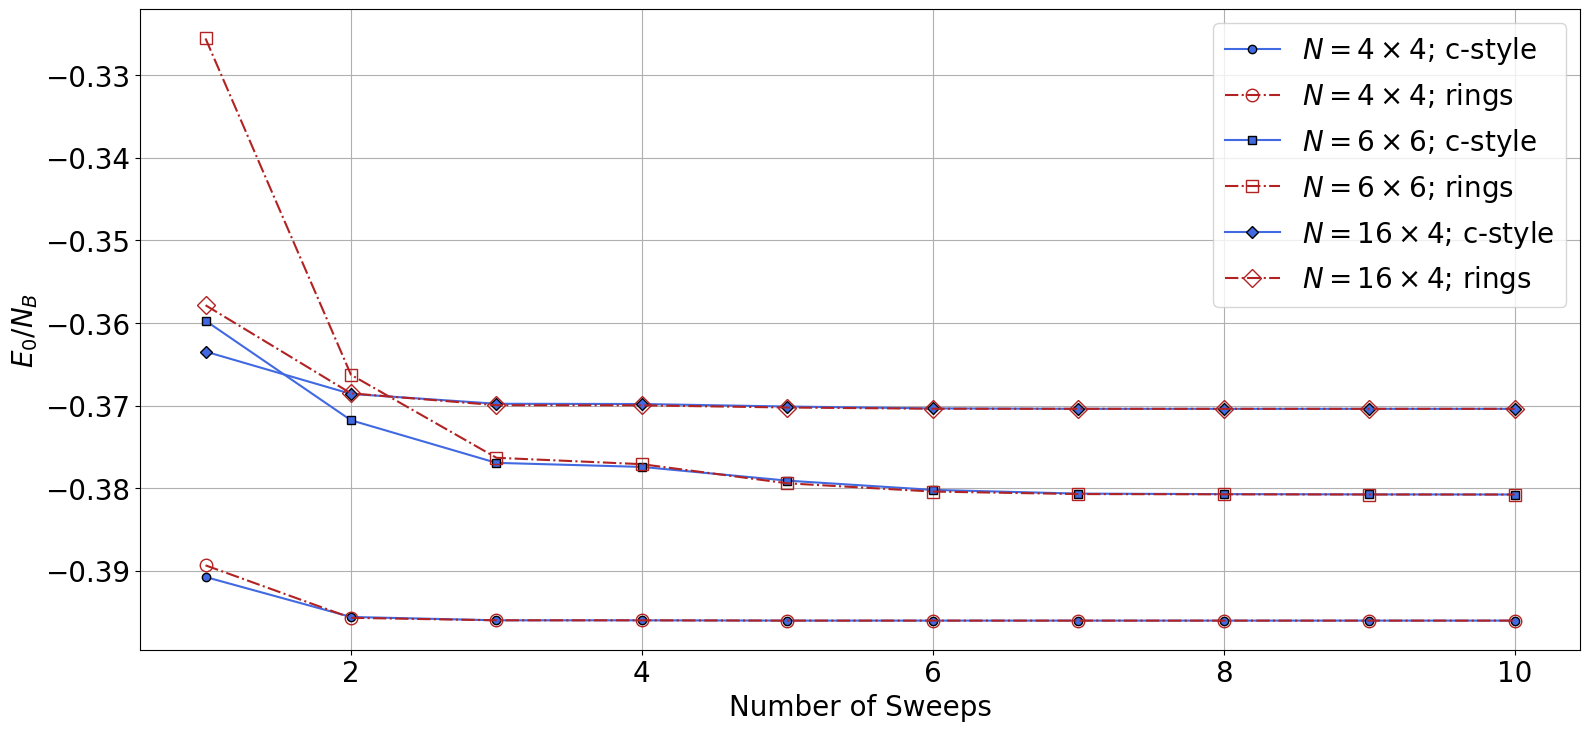

In [29]:
'''
    Extrapolate the ground state energy to the thermodynamic limit
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
color = obtain_colors(15, cm.gist_heat)

# Plot the original and staggered Czz
ax = fig.add_subplot(spec[0, 0])
for index, tmp_bond in enumerate(Nbond):
    tmp_cstyle = np.array(data_extrapolation(cstyle[index], "Ehist"))
    tmp_rings = np.array(data_extrapolation(rings[index], "Ehist"))
    ax.plot(np.arange(1, nsweeps + 1), tmp_cstyle[1::2] / tmp_bond, color = "royalblue", marker = marker[index], markersize = 6, \
            markeredgecolor = "black", label = label[index] + "; c-style")

    ax.plot(np.arange(1, nsweeps + 1), tmp_rings[1::2] / tmp_bond, linestyle = "-.", color = "firebrick", marker = marker[index], markersize = 9, \
            markerfacecolor = "none", label = label[index] + "; rings")

ax.set_xlabel(r'Number of Sweeps', fontsize = 20)
ax.set_ylabel(r'$E_{0} / N_{B}$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

# plt.savefig("notes/figures/2d_heisenberg_honetcomb_lattice_ordering_schemes_convergence.pdf")

In [122]:
nsweeps = 12
Nsite = 18
marker = ["o", "s", "D"]
color = ["royalblue", "firebrick", "teal"]
label = [r"$N = 3 \times 3$, OBC + rings" , r"$N = 3 \times 3$, PBC + rings", \
         r"$N = 3 \times 3$, OBC + C-style"]

files = ["data/2d_heisenberg_honeycomb_lattice_obc_rings_L6W3.h5", \
         "data/2d_heisenberg_honeycomb_lattice_pbc_rings_L6W3.h5", \
         "data/2d_heisenberg_honeycomb_lattice_obc_cstyle_L6W3.h5"]

<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>


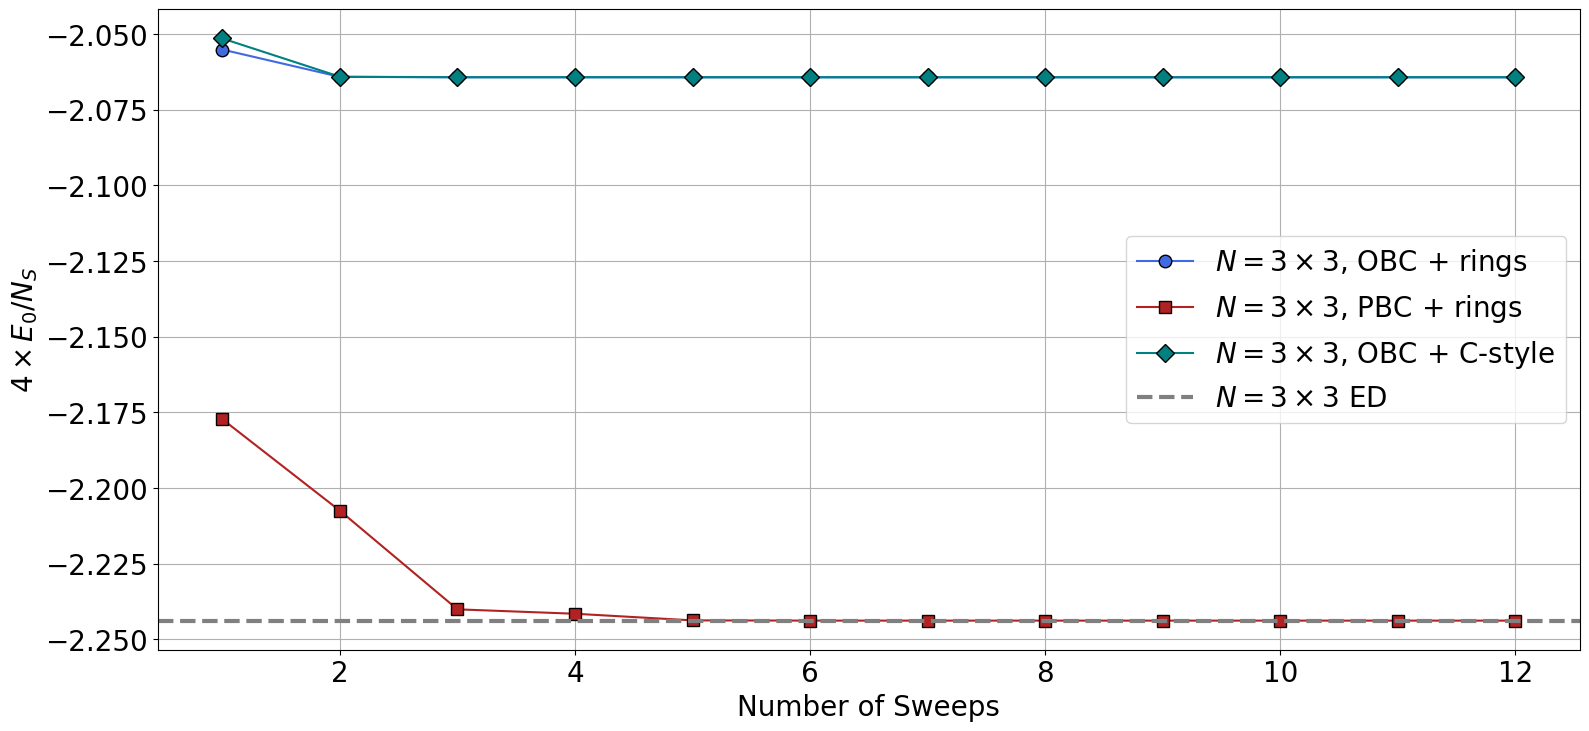

In [123]:
'''
    Extrapolate the ground state energy to the thermodynamic limit
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)

# Plot the original and staggered Czz
nsweeps = 12
ax = fig.add_subplot(spec[0, 0])
for index, tmp_file in enumerate(files):
    tmp = np.array(data_extrapolation(tmp_file, "Ehist"))
    ax.plot(np.arange(1, nsweeps + 1), 4 * tmp[1:2 *nsweeps:2] / Nsite, color = color[index], \
            marker = marker[index], markersize = 9, markeredgecolor = "black", label = label[index])

ax.axhline(y = -2.243814630334411, linestyle = "--", linewidth = 3, color = "gray", label = r"$N = 3 \times 3$ ED")    
ax.set_xlabel(r'Number of Sweeps', fontsize = 20)
ax.set_ylabel(r'$4 \times E_{0} / N_{S}$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

# plt.savefig("notes/figures/2d_heisenberg_honeycomb_lattice_DMRG_and_ED_comparison_L3.pdf")

In [52]:
E_ED = -2.243814630334411
E_DMRG = -2.2438146030301422
relative_err = abs((E_ED - E_DMRG) / E_ED)
relative_err

1.2168682855847954e-08

In [67]:
nsweeps = 15
Nsite = 8
marker = ["o", "s", "D"]
color = ["royalblue", "firebrick", "teal"]
label = [r"$N = 2 \times 2$, OBC + rings" , r"$N = 2 \times 2$, PBC + rings", \
         r"$N = 2 \times 2$, OBC + C-style"]

files = ["data/2d_heisenberg_honeycomb_lattice_obc_rings_L4W2.h5", \
         "data/2d_heisenberg_honeycomb_lattice_pbc_rings_L4W2.h5", \
         "data/2d_heisenberg_honeycomb_lattice_obc_cstyle_L4W2.h5"]

<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>


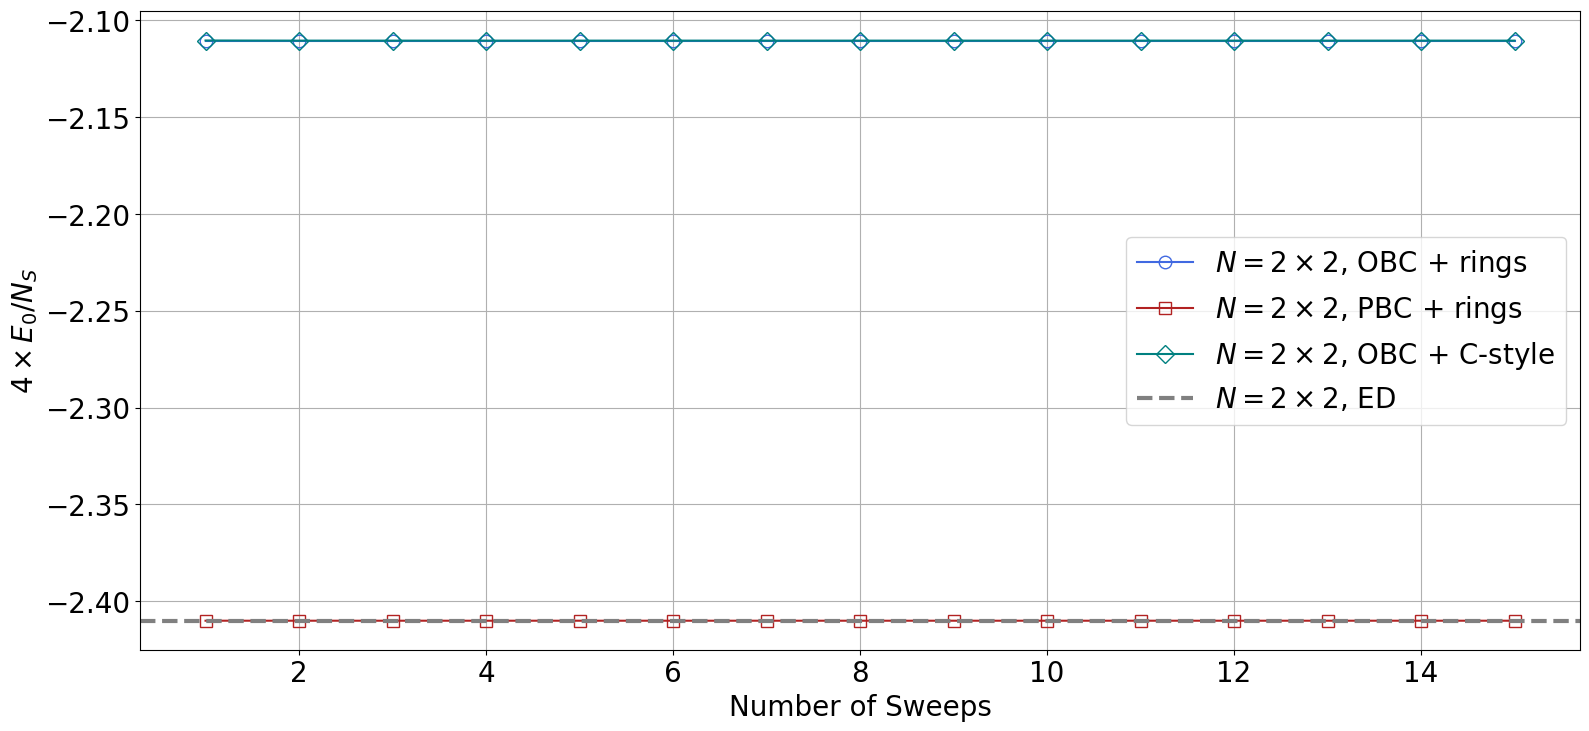

In [68]:
'''
    Extrapolate the ground state energy to the thermodynamic limit
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)

# Plot the original and staggered Czz
ax = fig.add_subplot(spec[0, 0])
for index, tmp_file in enumerate(files):
    tmp = np.array(data_extrapolation(tmp_file, "Ehist"))
    ax.plot(np.arange(1, nsweeps + 1), 4 * tmp[1::2] / Nsite, color = color[index], \
            marker = marker[index], markersize = 9, markerfacecolor = "none", label = label[index])

ax.axhline(y = -2.4100446871873946, linestyle = "--", linewidth = 3, color = "gray", label = r"$N = 2 \times 2$, ED")    
ax.set_xlabel(r'Number of Sweeps', fontsize = 20)
ax.set_ylabel(r'$4 \times E_{0} / N_{S}$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

plt.savefig("notes/figures/2d_heisenberg_honeycomb_lattice_DMRG_and_ED_comparison_L2.pdf")

In [69]:
E_ED = -2.4100446871873964
E_DMRG = -2.4100446871873946
relative_err = abs((E_ED - E_DMRG) / E_ED)
relative_err

7.370638597881431e-16

In [70]:
Nx = 8
Ny = 4
N = 2 * Nx * Ny

<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>


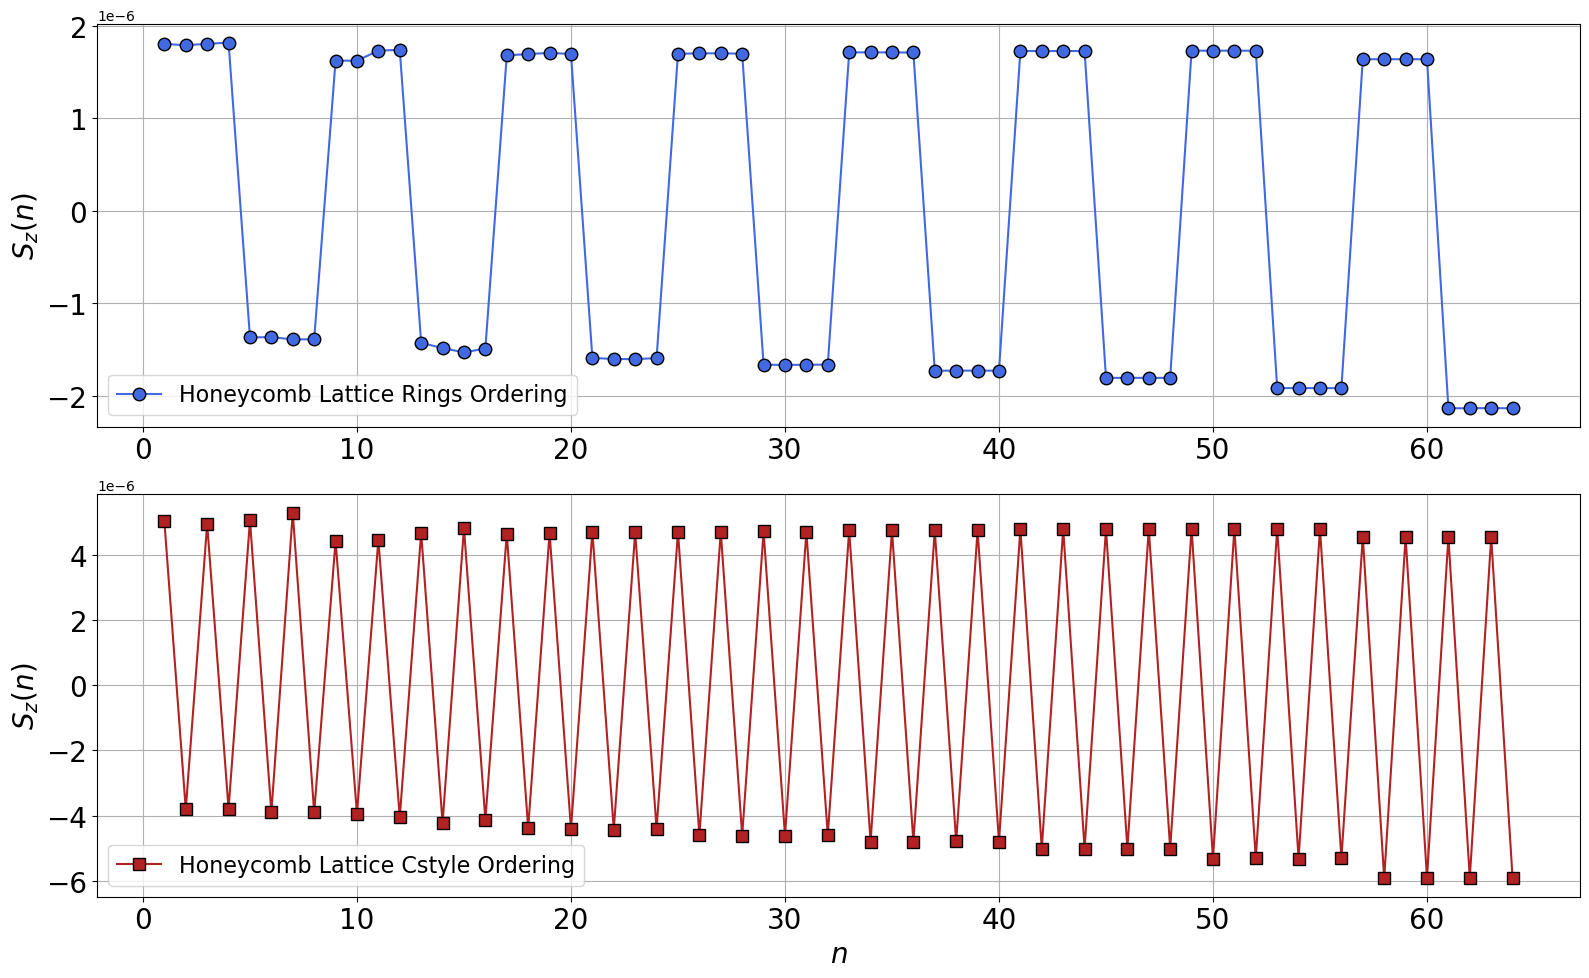

In [79]:
'''
    Analyze the Heisenberg model on a 2D square lattice & Plot the local observable Sz
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
# color = obtain_colors(15, cm.gist_heat_r)

# Plot initial and final Sz
ax = fig.add_subplot(spec[0, 0])
Sz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_rings_L16W4.h5', 'Sz')
ax.plot(np.arange(1, N + 1), Sz.real, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'Honeycomb Lattice Rings Ordering')
    
# ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$S_{z}(n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

# Plot initial and final Sz
ax = fig.add_subplot(spec[1, 0])
Sz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_cstyle_L16W4.h5', 'Sz')
ax.plot(np.arange(1, N + 1), Sz.real, color = "firebrick", marker = 's', markersize = 9, \
        markeredgecolor = 'black', label = r'Honeycomb Lattice Cstyle Ordering')
    
ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$S_{z}(n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_Sz_L8W4.pdf')

<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>
0.25000000000000006
<KeysViewHDF5 ['Czz', 'E0', 'Ehist', 'Sz', 'Sz0', 'psi']>
0.25


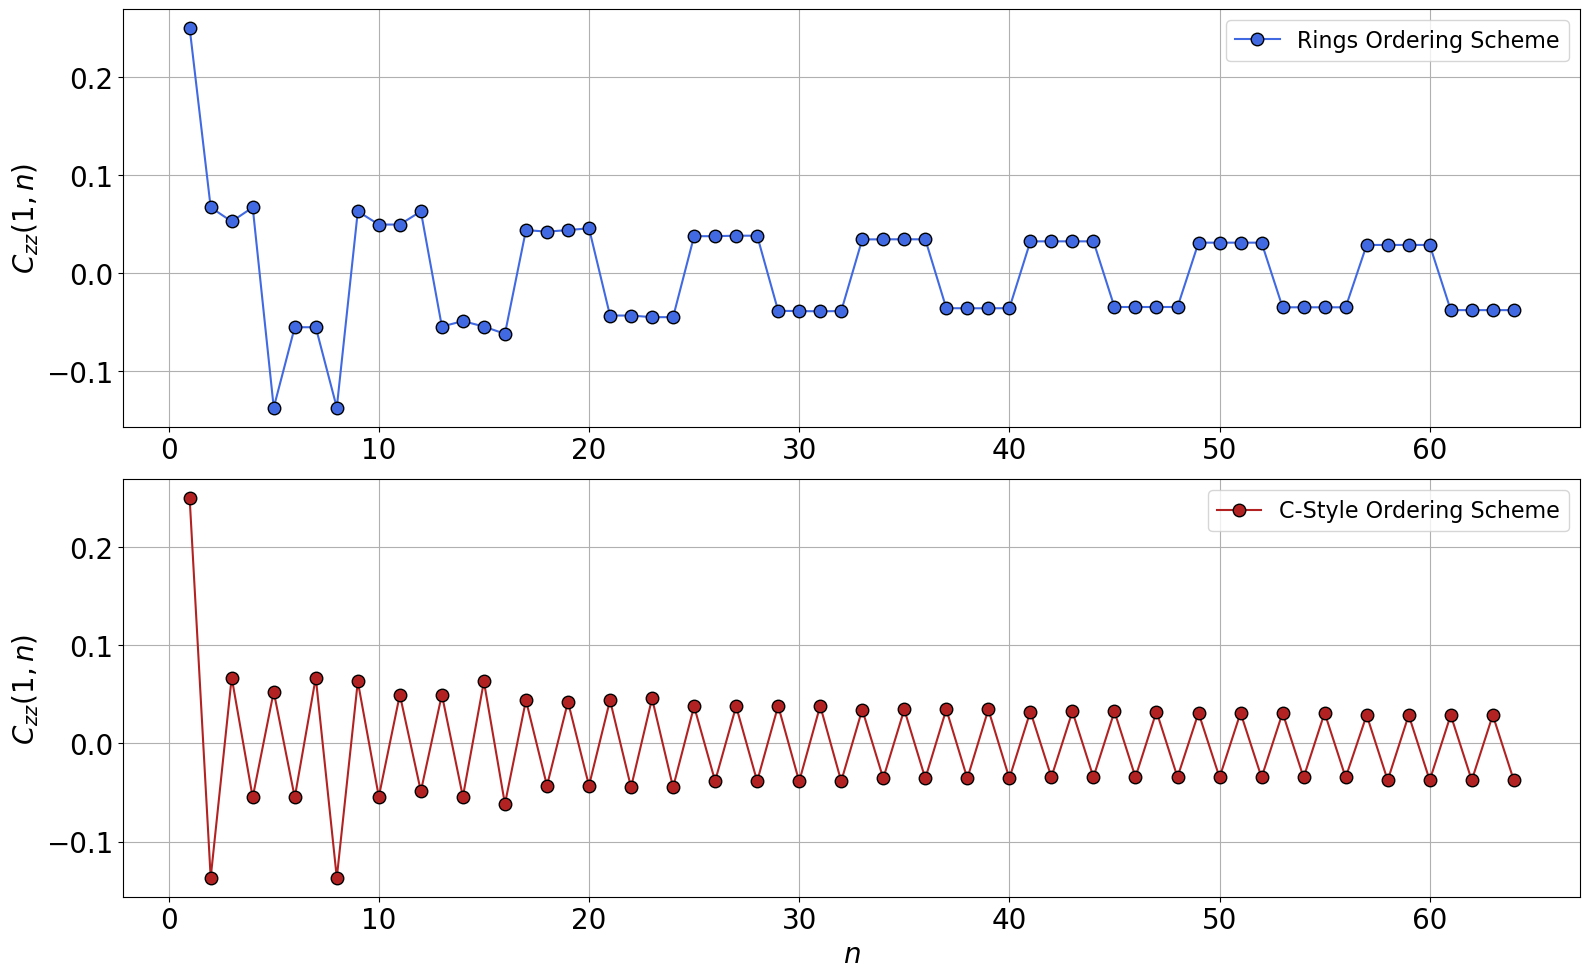

In [87]:
'''
    Analyze the Heisenberg model on a 2D square lattice & Plot the local observable Sz
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
# color = obtain_colors(15, cm.gist_heat_r)

# Plot initial and final Sz
ax = fig.add_subplot(spec[0, 0])
Czz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_rings_L16W4.h5', 'Czz')
Czz_to_plot = Czz[0, :]
print(Czz[0, 0])
ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'Rings Ordering Scheme')
    
# ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

# Plot initial and final Sz
ax = fig.add_subplot(spec[1, 0])
Czz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_cstyle_L16W4.h5', 'Czz')
Czz_to_plot = Czz[0, :]
print(Czz[0, 0])
ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "firebrick", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'C-Style Ordering Scheme')
    
ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_Czz_L8W4.pdf')

<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
0.25
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
0.25


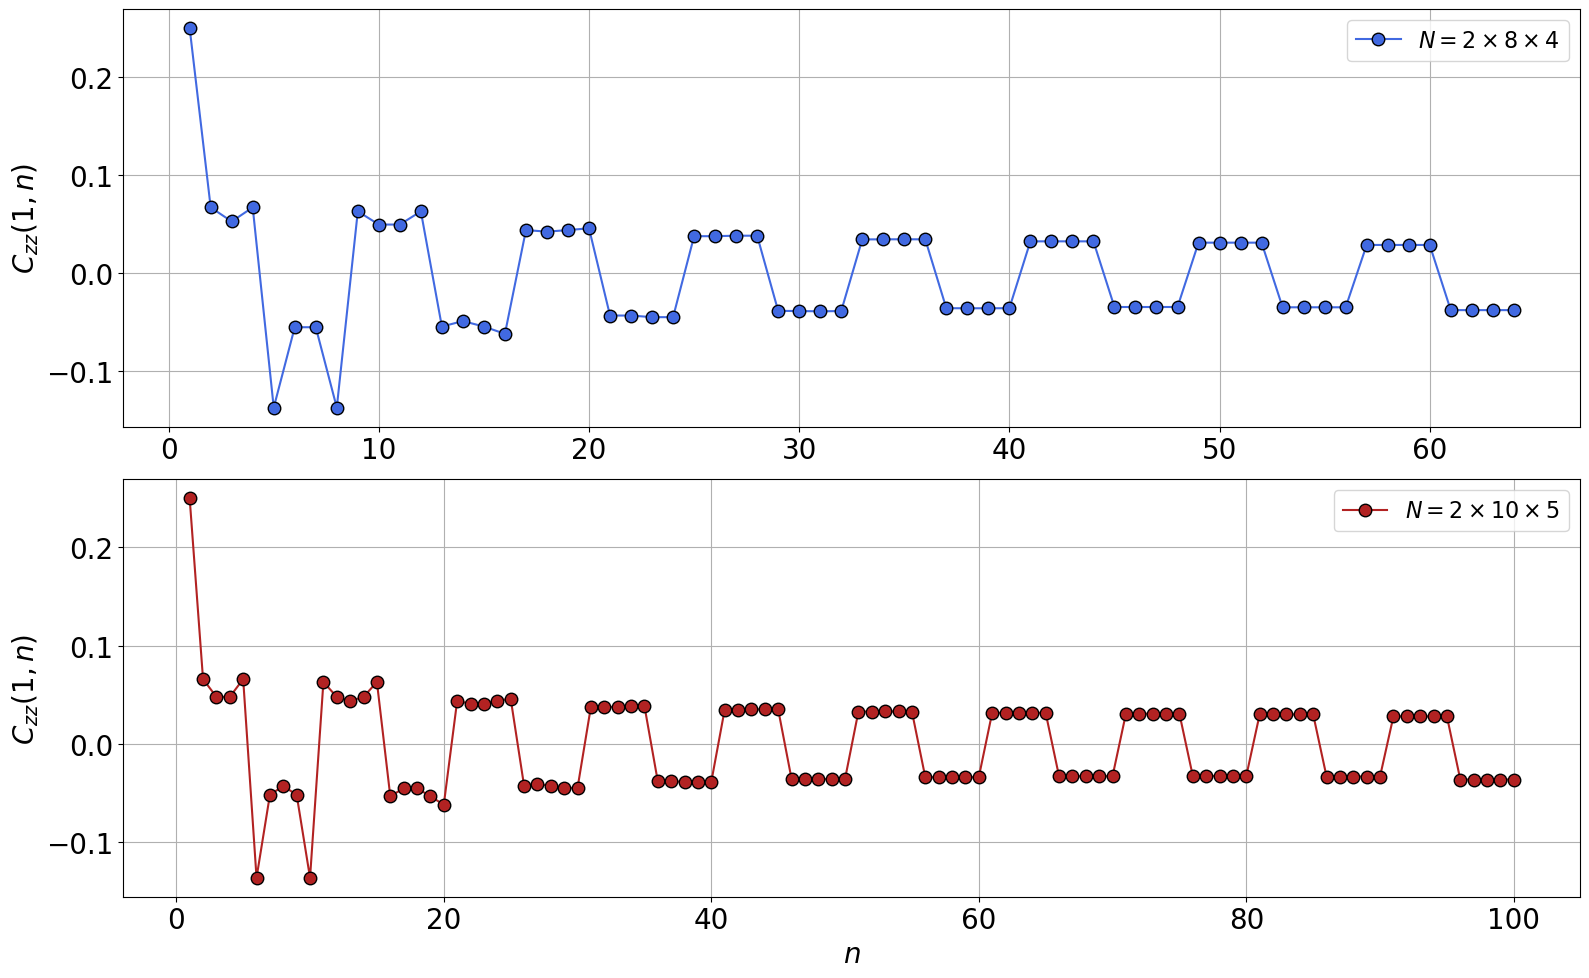

In [132]:
'''
    Analyze the Heisenberg model on a 2D square lattice & Plot the local observable Sz
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
# color = obtain_colors(15, cm.gist_heat_r)

# Plot initial and final Sz
ax = fig.add_subplot(spec[0, 0])
Nx = 8
Ny = 4
N = 2 * Nx * Ny
Czz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_obc_rings_L16W4.h5', 'Czz')
Czz_to_plot = Czz[0, :]
print(Czz[0, 0])
ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'$N = 2 \times 8 \times 4$')
    
# ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

# Plot initial and final Sz
ax = fig.add_subplot(spec[1, 0])
Nx = 10
Ny = 5
N = 2 * Nx * Ny
Czz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_obc_rings_L20W5.h5', 'Czz')
Czz_to_plot = Czz[0, :]
print(Czz[0, 0])
ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "firebrick", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'$N = 2 \times 10 \times 5$')
    
ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_open_Czz.pdf')

<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
-0.06173987988635795
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
-0.05791413723058321
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
-0.05704307549567817


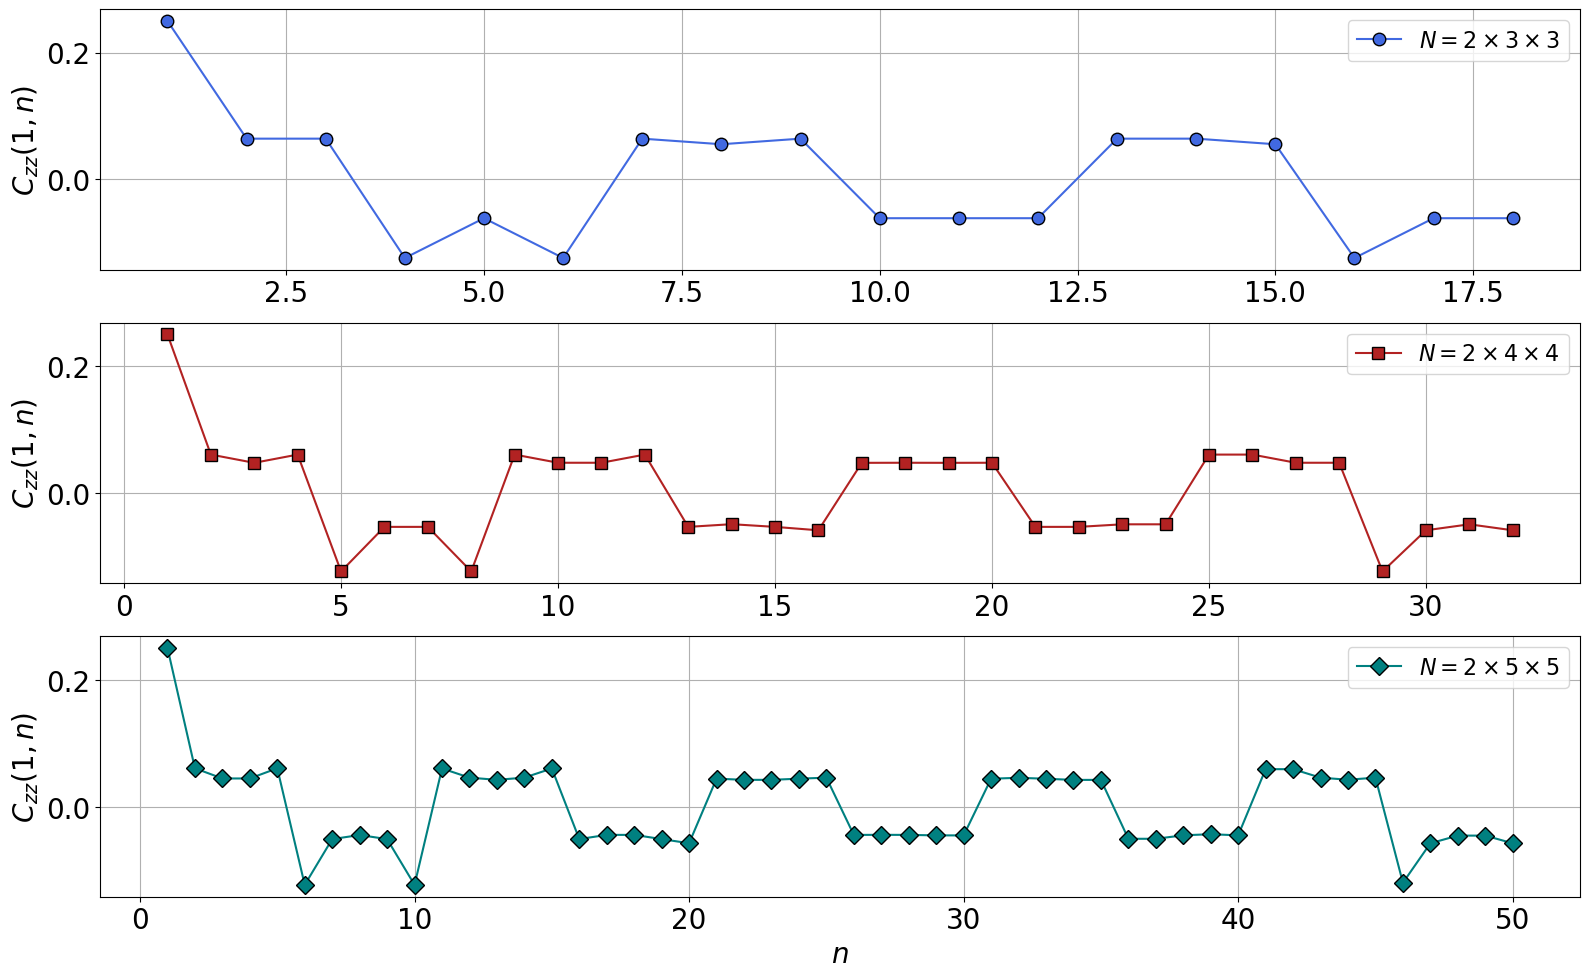

In [103]:
'''
    Analyze the Heisenberg model on a 2D square lattice & Plot the local observable Sz
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)
# color = obtain_colors(15, cm.gist_heat_r)

# Plot initial and final Sz
ax = fig.add_subplot(spec[0, 0])
Nx = 3
Ny = 3
N = 2 * Nx * Ny
Czz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_pbc_rings_L6W3.h5', 'Czz')
Czz_to_plot = Czz[0, :]
print(Czz[0, -1])
ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'$N = 2 \times 3 \times 3$')
    
# ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

# Plot initial and final Sz
ax = fig.add_subplot(spec[1, 0])
Nx = 4 
Ny = 4
N = 2 * Nx * Ny
Czz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_pbc_rings_L8W4.h5', 'Czz')
Czz_to_plot = Czz[0, :]
print(Czz[0, -1])
ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "firebrick", marker = 's', markersize = 9, \
        markeredgecolor = 'black', label = r'$N = 2 \times 4 \times 4$')
    
# ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

# Plot initial and final Sz
ax = fig.add_subplot(spec[2, 0])
Nx = 5
Ny = 5
N = 2 * Nx * Ny
Czz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_pbc_rings_L10W5.h5', 'Czz')
Czz_to_plot = Czz[0, :]
print(Czz[0, -1])
ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "teal", marker = 'D', markersize = 9, \
        markeredgecolor = 'black', label = r'$N = 2 \times 5 \times 5$')
    
ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_periodic_Czz.pdf')

<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>


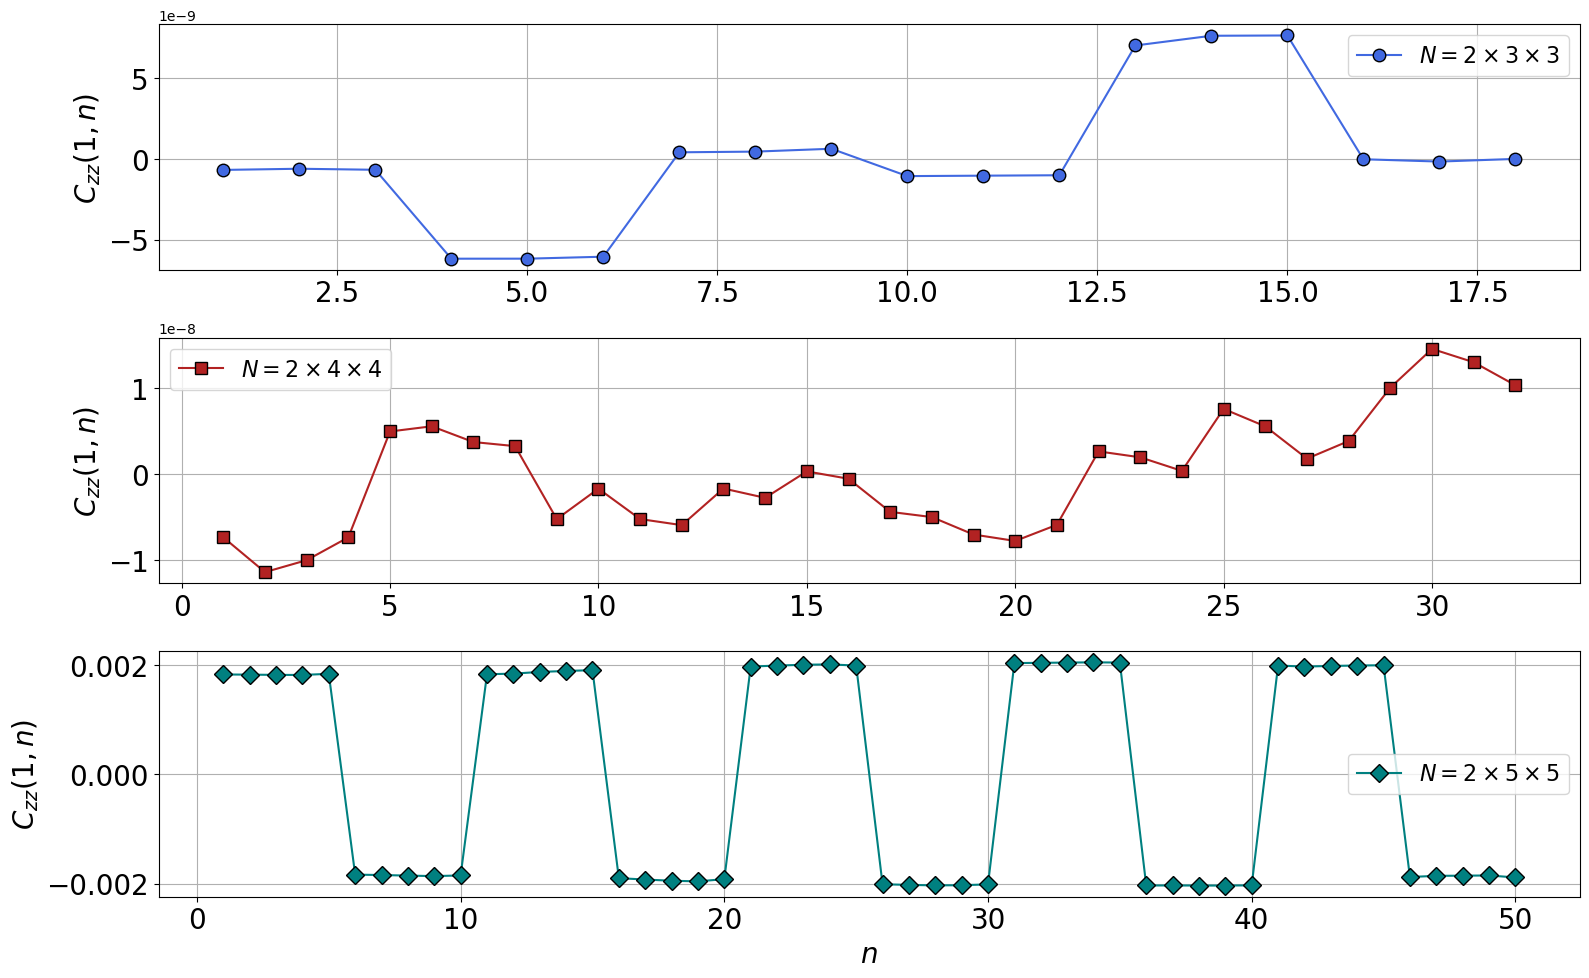

In [120]:
'''
    Analyze the Heisenberg model on a 2D square lattice & Plot the local observable Sz
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)
# color = obtain_colors(15, cm.gist_heat_r)

# Plot initial and final Sz
ax = fig.add_subplot(spec[0, 0])
Nx = 3
Ny = 3
N = 2 * Nx * Ny
Sz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_pbc_rings_L6W3.h5', 'Sz')
ax.plot(np.arange(1, N + 1), Sz, color = "royalblue", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'$N = 2 \times 3 \times 3$')
    
# ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

# Plot initial and final Sz
ax = fig.add_subplot(spec[1, 0])
Nx = 4 
Ny = 4
N = 2 * Nx * Ny
Sz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_pbc_rings_L8W4.h5', 'Sz')
ax.plot(np.arange(1, N + 1), Sz, color = "firebrick", marker = 's', markersize = 9, \
        markeredgecolor = 'black', label = r'$N = 2 \times 4 \times 4$')
    
# ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

# Plot initial and final Sz
ax = fig.add_subplot(spec[2, 0])
Nx = 5
Ny = 5
N = 2 * Nx * Ny
Sz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_pbc_rings_L10W5.h5', 'Sz')
ax.plot(np.arange(1, N + 1), Sz, color = "teal", marker = 'D', markersize = 9, \
        markeredgecolor = 'black', label = r'$N = 2 \times 5 \times 5$')
    
ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 5)
ax.grid()  

# plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_periodic_Czz.pdf')

<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>


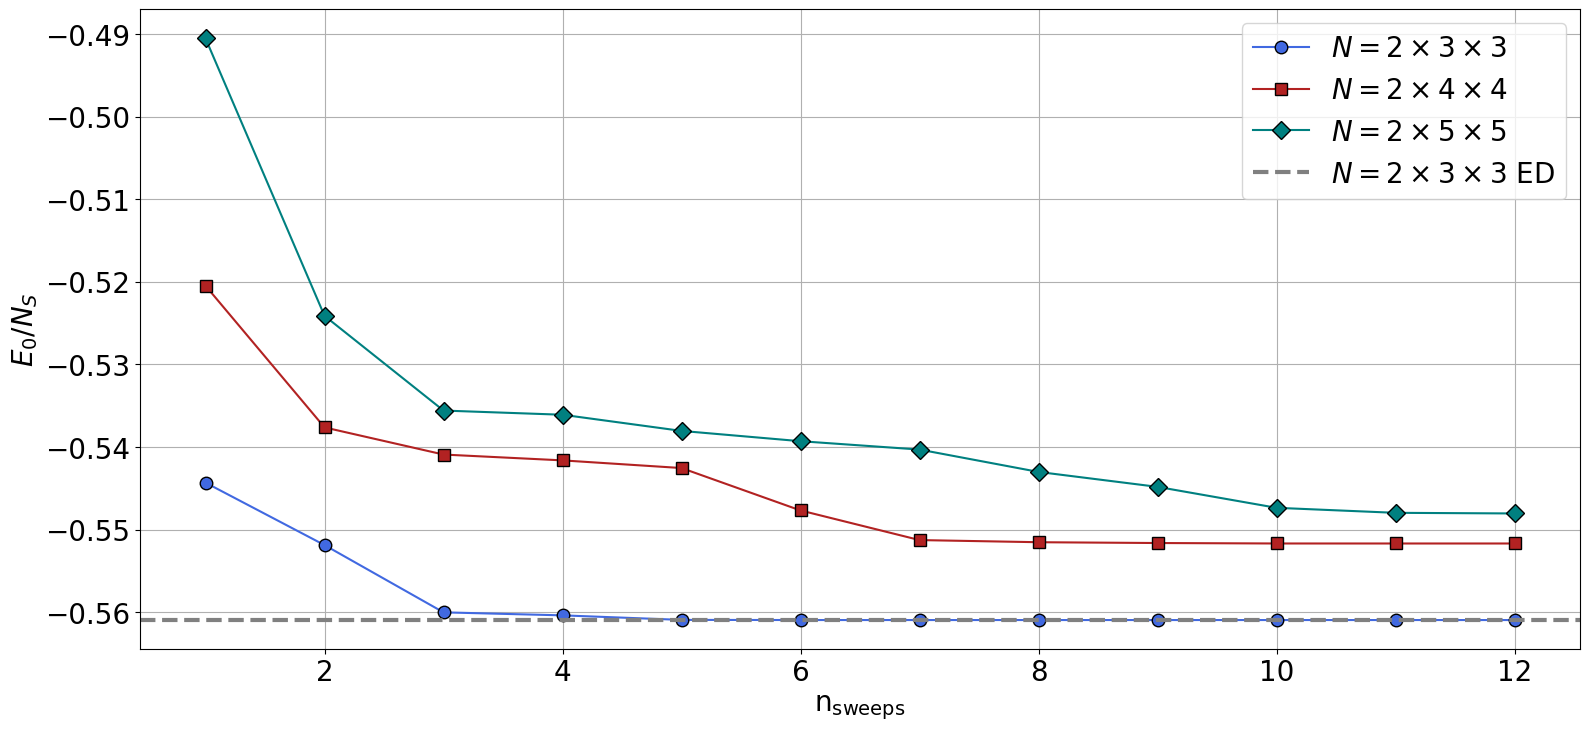

In [27]:
'''
    Analyze the Heisenberg model on a honeycomb lattice with torus geometery
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)

# Plot the history of energy convergence
nsweeps = 12
E0_file = ['data/2d_heisenberg_honeycomb_lattice_pbc_rings_L6W3.h5', 'data/2d_heisenberg_honeycomb_lattice_pbc_rings_L8W4.h5', \
          'data/2d_heisenberg_honeycomb_lattice_pbc_rings_L10W5.h5']
symbol = ["o", "s", "D"]
color = ["royalblue", "firebrick", "teal"]
label = [r"$N = 2 \times 3 \times 3$", r"$N = 2 \times 4 \times 4$", r"$N = 2 \times 5 \times 5$"]
sites = [18, 32, 50]

ax = fig.add_subplot(spec[0, 0])
for index, tmp_file in enumerate(E0_file):
    E0 = data_extrapolation(tmp_file, 'Ehist')
    ax.plot(np.arange(1, nsweeps + 1), E0[1:2*nsweeps:2] / sites[index], color = color[index], marker = symbol[index], markersize = 9, \
            markeredgecolor = 'black', label = label[index])

ax.axhline(y = -2.243814630334411 / 4, linestyle = "--", linewidth = 3, color = "gray", label = r"$N = 2 \times 3 \times 3$ ED")   

ax.set_xlabel(r'$\rm n_{sweeps}$', fontsize = 20)
ax.set_ylabel(r'$E_{0} / N_{S}$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_periodic_energy.pdf')

<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'Entropy', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
[-0.50099999 -9.22176135 -9.22176135 -9.28859708 -9.28859708 -9.28950022
 -9.28950022 -9.2895005  -9.2895005  -9.28950884 -9.28950884 -9.28950893
 -9.28950893 -9.28950893 -9.28950893 -9.28950893 -9.28950893 -9.28950893
 -9.28950893 -9.28950893 -9.28950893 -9.28950893 -9.28950893 -9.28950893]
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
[ -0.92584557 -16.17757817 -16.17757817 -16.55131108 -16.55131108
 -16.59898259 -16.59898259 -16.60309945 -16.60309945 -16.61074055
 -16.61074055 -16.61148261 -16.61148261 -16.61152271 -16.61152271
 -16.61152357 -16.61152357 -16.6115236  -16.6115236  -16.61152361
 -16.61152361 -16.61152361 -16.61152361 -16.61152361]
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
[ -1.39860358 -24.23882186 -24.23882186 -25.64665552 -25.64665552
 -25.99036794 -25.99036794 -26.02545706 -26.0254

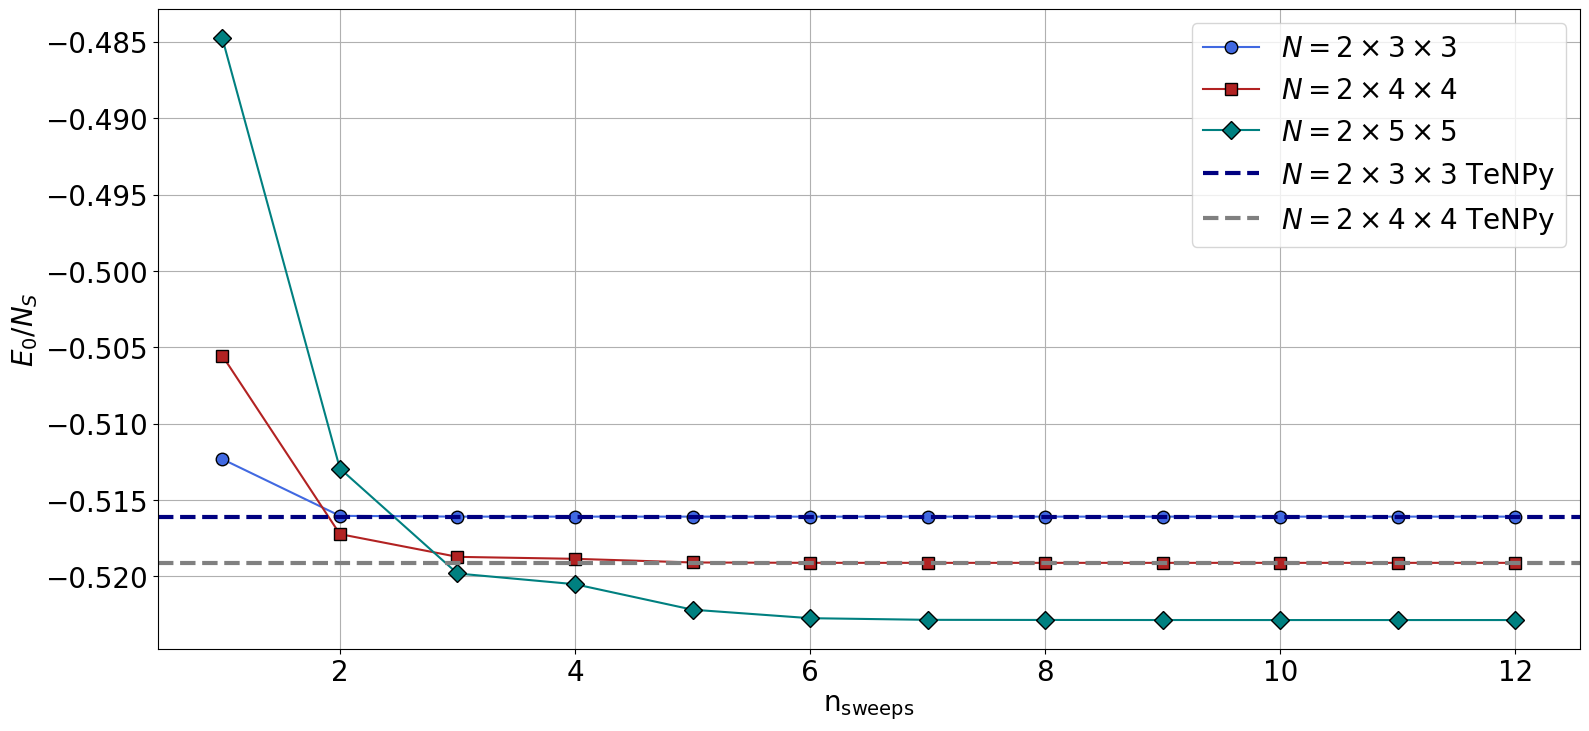

In [201]:
'''
    Analyze the Heisenberg model on a honeycomb lattice with torus geometery
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)

# Plot the history of energy convergence
nsweeps = 12
E0_file = ['data/2d_heisenberg_honeycomb_lattice_obc_rings_L6W3.h5', 'data/2d_heisenberg_honeycomb_lattice_obc_rings_L8W4.h5', \
           'data/2d_heisenberg_honeycomb_lattice_obc_rings_L10W5.h5']
symbol = ["o", "s", "D"]
color = ["royalblue", "firebrick", "teal"]
label = [r"$N = 2 \times 3 \times 3$", r"$N = 2 \times 4 \times 4$", r"$N = 2 \times 5 \times 5$"]
sites = [18, 32, 50]

ax = fig.add_subplot(spec[0, 0])
for index, tmp_file in enumerate(E0_file):
    E0 = data_extrapolation(tmp_file, 'Ehist')
    ax.plot(np.arange(1, nsweeps + 1), E0[1:2*nsweeps:2] / sites[index], color = color[index], marker = symbol[index], markersize = 9, \
            markeredgecolor = 'black', label = label[index])
    print(E0)
ax.axhline(y = -9.2895093695777 / 18, linestyle = "--", linewidth = 3, color = "navy", label = r"$N = 2 \times 3 \times 3$ TeNPy")
ax.axhline(y = -16.611525365708 / 32, linestyle = "--", linewidth = 3, color = "gray", label = r"$N = 2 \times 4 \times 4$ TeNPy")   

ax.set_xlabel(r'$\rm n_{sweeps}$', fontsize = 20)
ax.set_ylabel(r'$E_{0} / N_{S}$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

# plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_open_energy.pdf')

In [205]:
# Read spin correlation funciton from the output file generated using TeNPy
import pickle

with open("data/2d_heisenberg_honeycomb_L3W3.pkl", "rb") as file:
    tenpy_data = pickle.load(file)

In [206]:
Czz_tenpy = np.array(tenpy_data['corr_ZZ'])
Czz_tenpy.shape

(1, 18, 18)

In [207]:
Nx = 3
Ny = 3
N = 2 * Nx * Ny
Czz = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_obc_rings_L6W3.h5', 'Czz')

<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'Entropy', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>


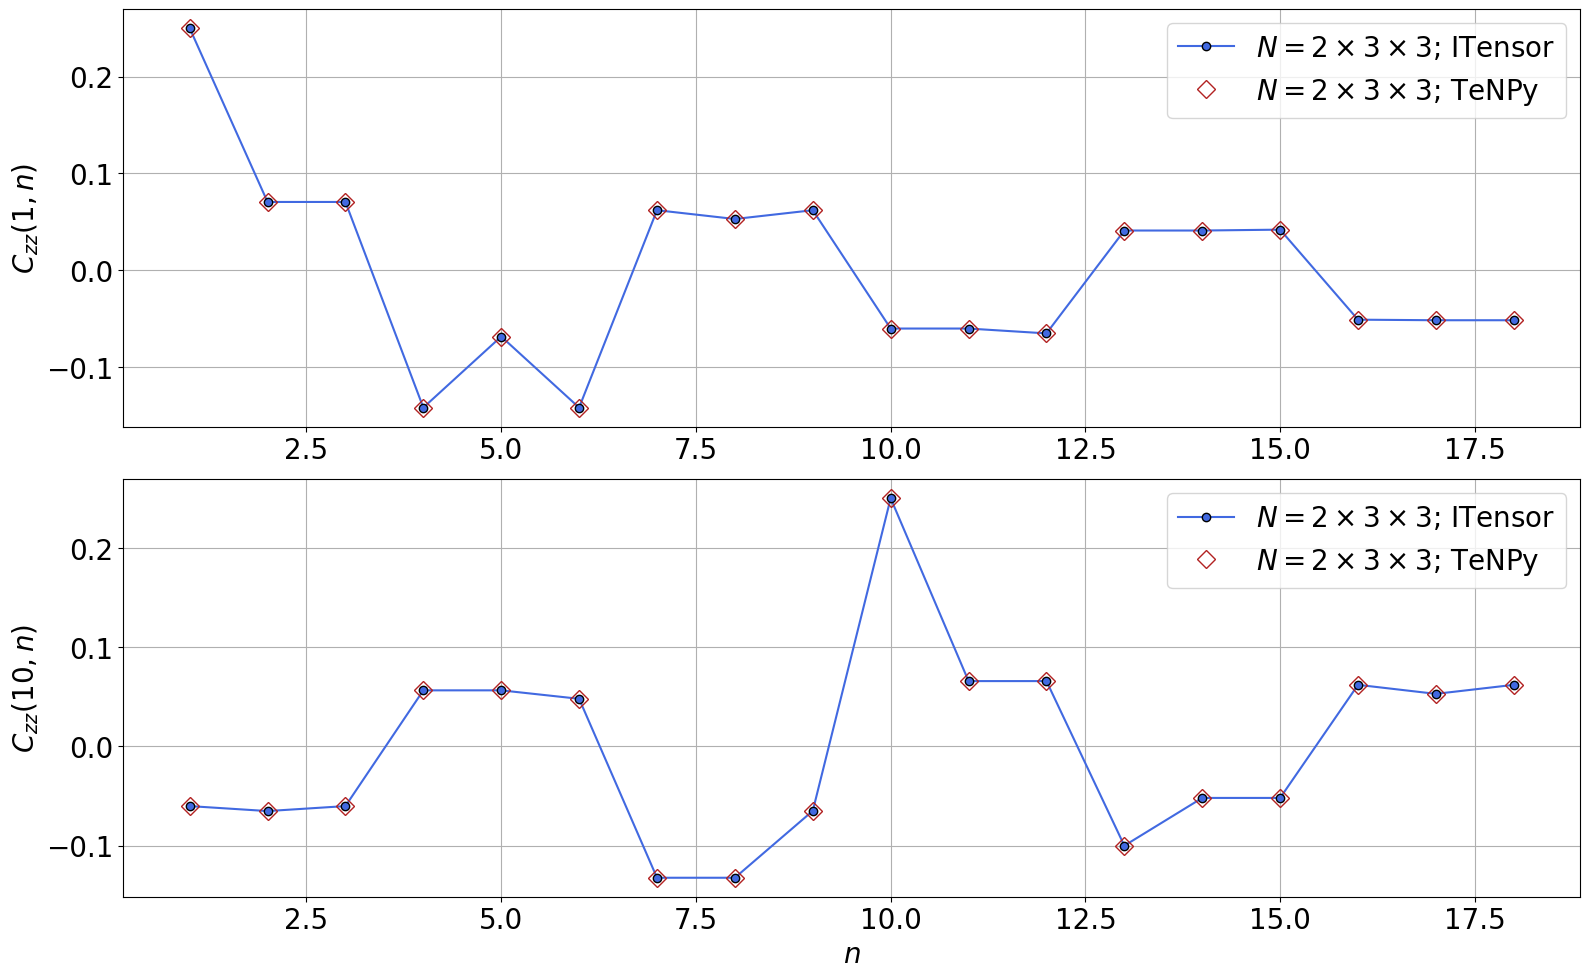

In [210]:
'''
    Analyze the Heisenberg model on a 2D square lattice & Plot the local observable Sz
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

# Plot the spin correlation function computed using ITensor and TeNPy simultaneously
ax = fig.add_subplot(spec[0, 0])

Czz_to_plot = Czz[0, :]
ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "royalblue", marker = 'o', markersize = 6, \
        markeredgecolor = 'black', label = r'$N = 2 \times 3 \times 3$; ITensor')

ax.plot(np.arange(1, N + 1), Czz_tenpy[0, 0, :], color = "firebrick", marker = 'D', markersize = 9, \
        markerfacecolor = "none", linestyle = " ", label = r'$N = 2 \times 3 \times 3$; TeNPy')
    
# ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

# Plot the spin correlation function computed using ITensor and TeNPy simultaneously
ax = fig.add_subplot(spec[1, 0])

Czz_to_plot = Czz[9, :]
ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "royalblue", marker = 'o', markersize = 6, \
        markeredgecolor = 'black', label = r'$N = 2 \times 3 \times 3$; ITensor')

ax.plot(np.arange(1, N + 1), Czz_tenpy[0, 9, :], color = "firebrick", marker = 'D', markersize = 9, \
        markerfacecolor = "none", linestyle = " ", label = r'$N = 2 \times 3 \times 3$; TeNPy')
    
ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(10, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_open_Czz_L3W3.pdf')

<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'Entropy', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['E0', 'Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['E0', 'Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['E0', 'Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['E0', 'Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['E0', 'Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sz', 'Sz0', 'psi']>
<KeysViewHDF5 ['E0', 'Sx', 'Sx0', 'Sz', 'Sz0', 'psi']>


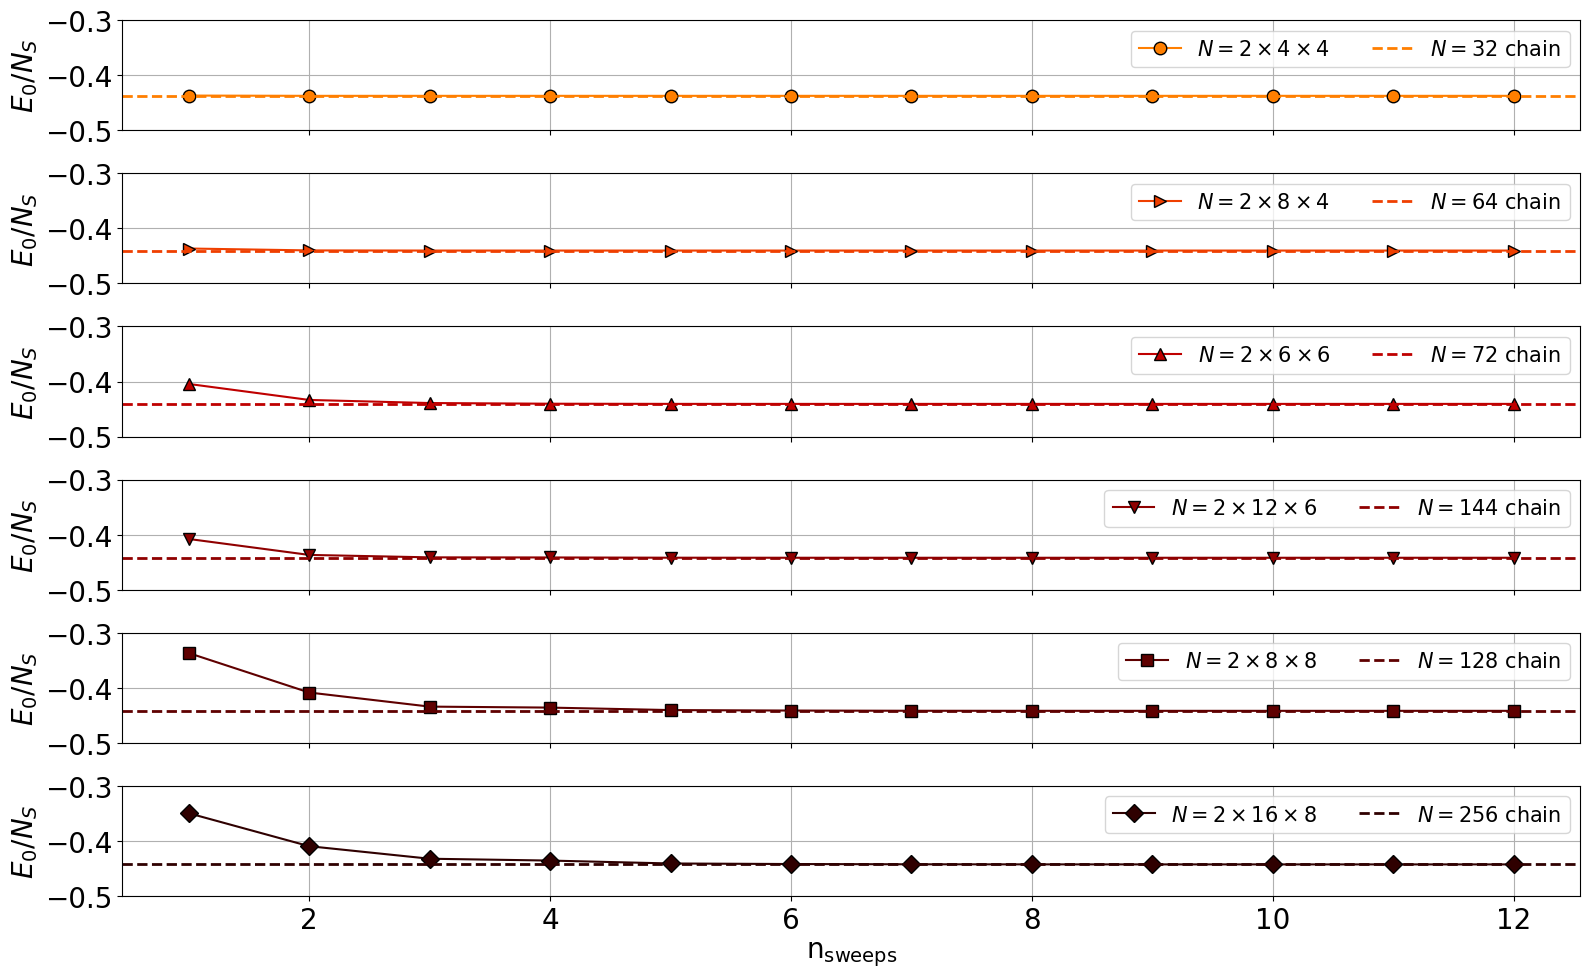

In [117]:
'''
    Analyze the Heisenberg model on a honeycomb lattice with torus geometery
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 6, ncols = 1, figure = fig)

# Plot the history of energy convergence
nsweeps = 12
E0_file = ['data/2d_heisenberg_honeycomb_lattice_1d_rings_L8W4.h5', \
           'data/2d_heisenberg_honeycomb_lattice_1d_rings_L16W4.h5', \
           'data/2d_heisenberg_honeycomb_lattice_1d_rings_L12W6.h5', \
           'data/2d_heisenberg_honeycomb_lattice_1d_rings_L24W6.h5', \
           'data/2d_heisenberg_honeycomb_lattice_1d_rings_L16W8.h5', \
           'data/2d_heisenberg_honeycomb_lattice_1d_rings_L32W8.h5']
E0_DMRG = ['data/1d_heisenberg_N32.h5', \
           'data/1d_heisenberg_N64.h5', \
           'data/1d_heisenberg_N72.h5', \
           'data/1d_heisenberg_N144.h5', \
           'data/1d_heisenberg_N128.h5', \
           'data/1d_heisenberg_N256.h5']
label = [r"$N = 2 \times 4 \times 4$", \
         r"$N = 2 \times 8 \times 4$", \
         r"$N = 2 \times 6 \times 6$", \
         r"$N = 2 \times 12 \times 6$", \
         r"$N = 2 \times 8 \times 8$", \
         r"$N = 2 \times 16 \times 8$"]
label_DMRG = [r"$N = 32$ chain", \
              r"$N = 64$ chain", \
              r"$N = 72$ chain", \
              r"$N = 144$ chain", \
              r"$N = 128$ chain", \
              r"$N = 256$ chain"]
symbol = ["o", ">", "^", "v", "s", "D"]
sites = [32, 64, 72, 144, 128, 256]
color = obtain_colors(len(E0_file) + 3, cm.gist_heat_r)

for index, tmp_file in enumerate(E0_file):
    ax = fig.add_subplot(spec[index, 0])
    E0 = data_extrapolation(tmp_file, 'Ehist')
    ax.plot(np.arange(1, nsweeps + 1), E0[1:2*nsweeps:2] / sites[index], color = color[index + 2], marker = symbol[index], markersize = 9, \
            markeredgecolor = 'black', label = label[index])

    E0 = data_extrapolation(E0_DMRG[index], 'E0')
    ax.axhline(E0 / sites[index], linestyle = "--", linewidth = 2, color = color[index + 2], label = label_DMRG[index])
    
    if index != len(E0_file) - 1:
        ax.set_xticklabels([])
    ax.set_ylabel(r'$E_{0} / N_{S}$', fontsize = 20)    
    ax.set_ylim(-0.5, -0.3)
    ax.tick_params(axis = "both", which = "major", labelsize = 20) 
    ax.legend(frameon = True, fontsize = 15, ncol = 2)
    ax.grid()  
    
ax.set_xlabel(r'$\rm n_{sweeps}$', fontsize = 20)

plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_map_to_1d_chain_energy.pdf')

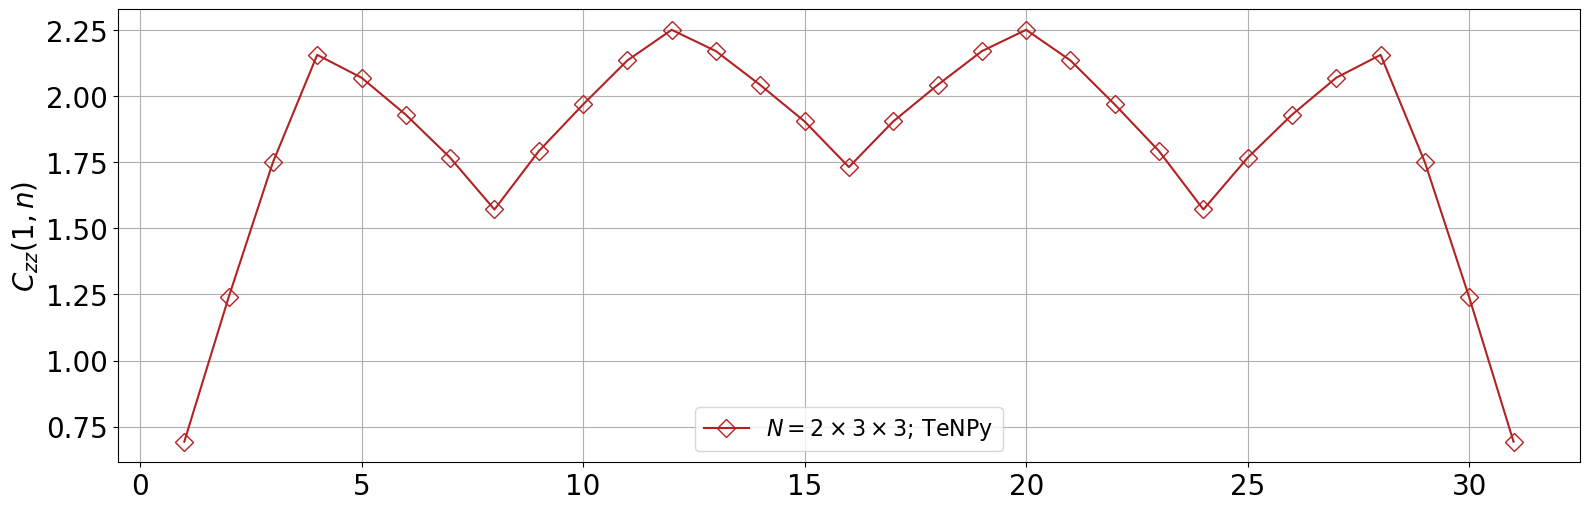

In [112]:
'''
    Analyze the Heisenberg model on a 2D square lattice & Plot the local observable Sz
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

# Plot the spin correlation function computed using ITensor and TeNPy simultaneously
ax = fig.add_subplot(spec[0, 0])

# SvN_itensor = data_extrapolation('data/2d_heisenberg_honeycomb_lattice_obc_rings_L6W3.h5', 'Entropy')
# ax.plot(np.arange(1, 25), SvN_itensor, color = "royalblue", marker = 'o', markersize = 6, \
#         markeredgecolor = 'black', label = r'$N = 2 \times 3 \times 3$; ITensor')

SvN_tenpy = np.array(tenpy_data['entropy'])
ax.plot(np.arange(1, N), SvN_tenpy[0, :], color = "firebrick", marker = 'D', markersize = 9, \
        markerfacecolor = "none", label = r'$N = 2 \times 3 \times 3$; TeNPy')
    
# ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 16, ncol = 1)
ax.grid()  

# # Plot the spin correlation function computed using ITensor and TeNPy simultaneously
# ax = fig.add_subplot(spec[1, 0])

# Czz_to_plot = Czz[9, :]
# ax.plot(np.arange(1, N + 1), Czz_to_plot.real, color = "royalblue", marker = 'o', markersize = 6, \
#         markeredgecolor = 'black', label = r'$N = 2 \times 3 \times 3$; ITensor')

# ax.plot(np.arange(1, N + 1), Czz_tenpy[0, 9, :], color = "firebrick", marker = 'D', markersize = 9, \
#         markerfacecolor = "none", label = r'$N = 2 \times 3 \times 3$; TeNPy')
    
# # ax.set_xlabel(r'$n$', fontsize = 20)
# ax.set_ylabel(r'$C_{zz}(9, n)$', fontsize = 20)    
# ax.tick_params(axis = "both", which = "major", labelsize = 20) 
# ax.legend(frameon = True, fontsize = 16, ncol = 1)
# ax.grid()  

# plt.savefig('notes/figures/2d_heisenberg_honeycomb_lattice_periodic_Czz.pdf')

##### ANALYZE THE KITAEV MODEL IN TWO DIMENSIONS ON A HONEYCOMB LATTICE

<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>


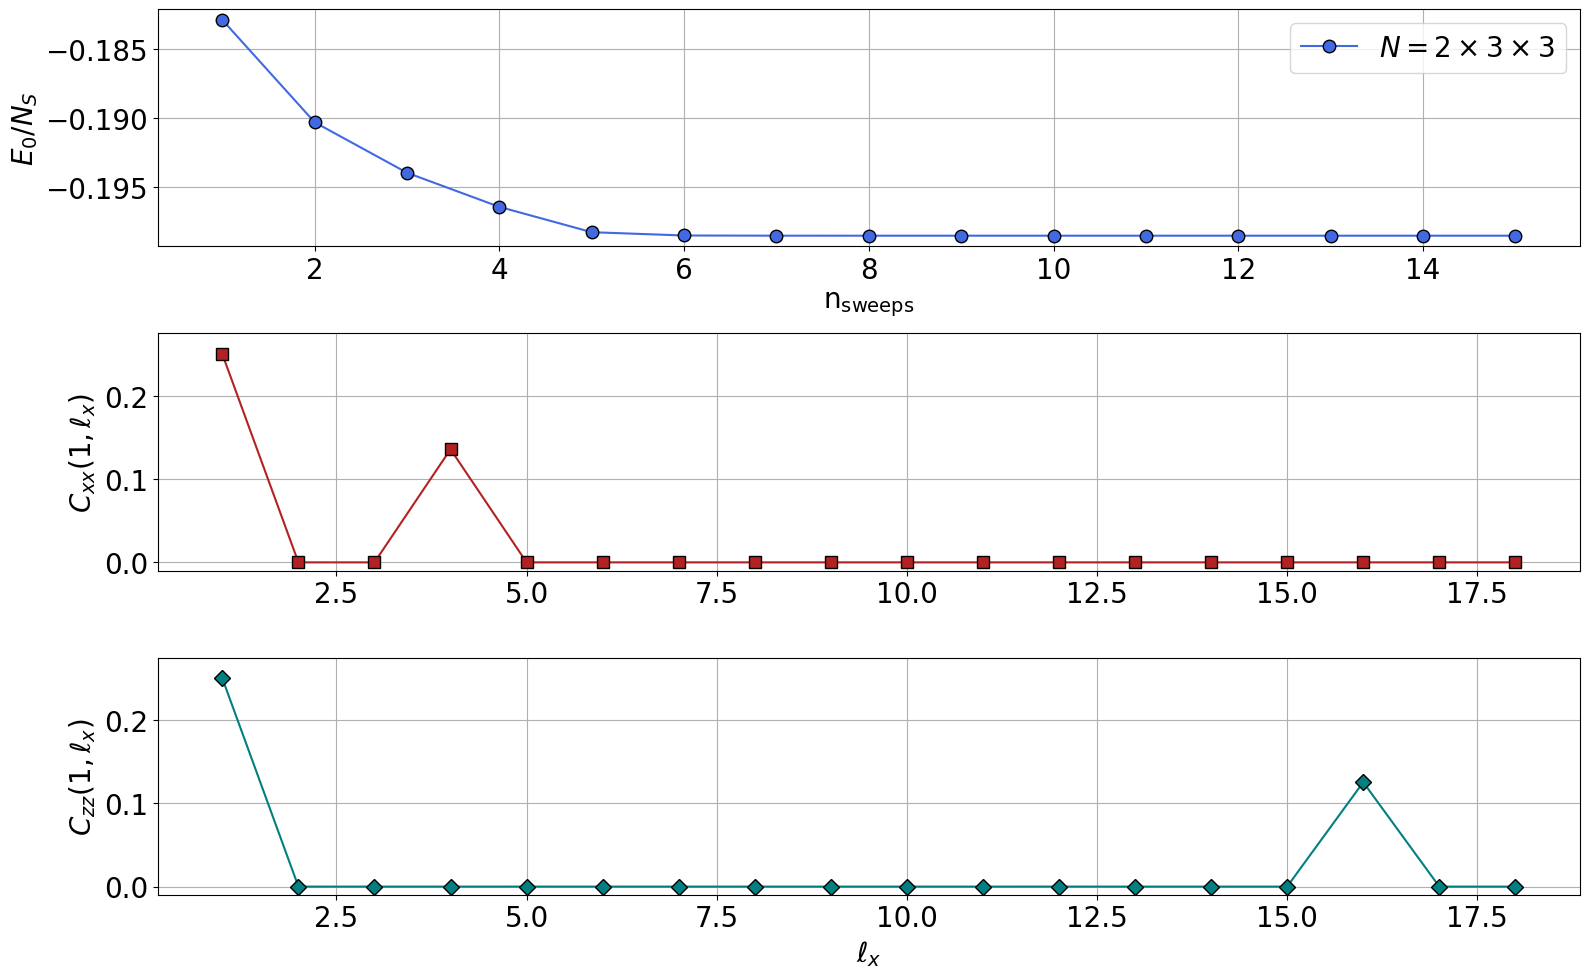

In [137]:
'''
    Analyze the Kitaev model with a torus geometry
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)

# Plot the history of energy convergence
# nsweeps = 12
E0_file = ["data/L3W3_FM/2d_kitaev_FM_h0.001.h5"]
symbol = ["o", "s", "D"]
color = ["royalblue", "firebrick", "teal"]
label = [r"$N = 2 \times 3 \times 3$"]
sites = [18]

ax = fig.add_subplot(spec[0, 0])
for index, tmp_file in enumerate(E0_file):
    E0 = data_extrapolation(tmp_file, 'Ehist')
    ax.plot(np.arange(1, len(E0)//2 + 1), E0[1::2] / sites[index], color = color[index], marker = symbol[index], markersize = 9, \
            markeredgecolor = 'black', label = label[index])
    
ax.set_xlabel(r'$\rm n_{sweeps}$', fontsize = 20)
ax.set_ylabel(r'$E_{0} / N_{S}$', fontsize = 20)    
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

ax = fig.add_subplot(spec[1, 0])
for index, tmp_file in enumerate(E0_file):
    Cxx = data_extrapolation(tmp_file, 'Cxx')
    ax.plot(np.arange(1, sites[0] + 1), Cxx[0, :].real, color = color[index + 1], marker = symbol[index + 1], markersize = 8, \
            markeredgecolor = 'black', label = label[index])

# print(Cxx[0, :])
ax.set_ylabel(r'$C_{xx}(1, \ell_{x})$', fontsize = 20)    
ax.set_ylim(-0.01, 0.275)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.grid()  

ax = fig.add_subplot(spec[2, 0])
for index, tmp_file in enumerate(E0_file):
    Czz = data_extrapolation(tmp_file, 'Czz')
    ax.plot(np.arange(1, sites[0] + 1), Czz[0, :].real, color = color[index + 2], marker = symbol[index + 2], markersize = 8, \
            markeredgecolor = 'black', label = label[index])

# print(Czz[0, :])
ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, \ell_{x})$', fontsize = 20)  
ax.set_ylim(-0.01, 0.275)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.grid()  

plt.savefig('notes/figures/2d_kitaev_honeycomb_lattice_PBC_FM_L3W3_h0.001.pdf')

<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
[0.25       0.07838657 0.07838657 0.10320393 0.07870913 0.06892471
 0.07838657 0.07868303 0.07667269 0.07870913 0.07892855 0.07797807
 0.07838657 0.07667269 0.07868303 0.06892471 0.07797807 0.07884928]
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
[0.07667269 0.07868303 0.07838657 0.07797807 0.07884928 0.06892471
 0.07838657 0.07838657 0.25       0.07870913 0.06892471 0.10320393
 0.07868303 0.07667269 0.07838657 0.07892855 0.07797807 0.07870913]
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
[0.25      +0.00000000e+00j 0.07667269-6.93889390e-18j
 0.07667269+0.00000000e+00j 0.06892471-3.46944695e-18j
 0.07892856+3.46940723e-17j 0.06892471+3.04302061e-17j
 0.07838

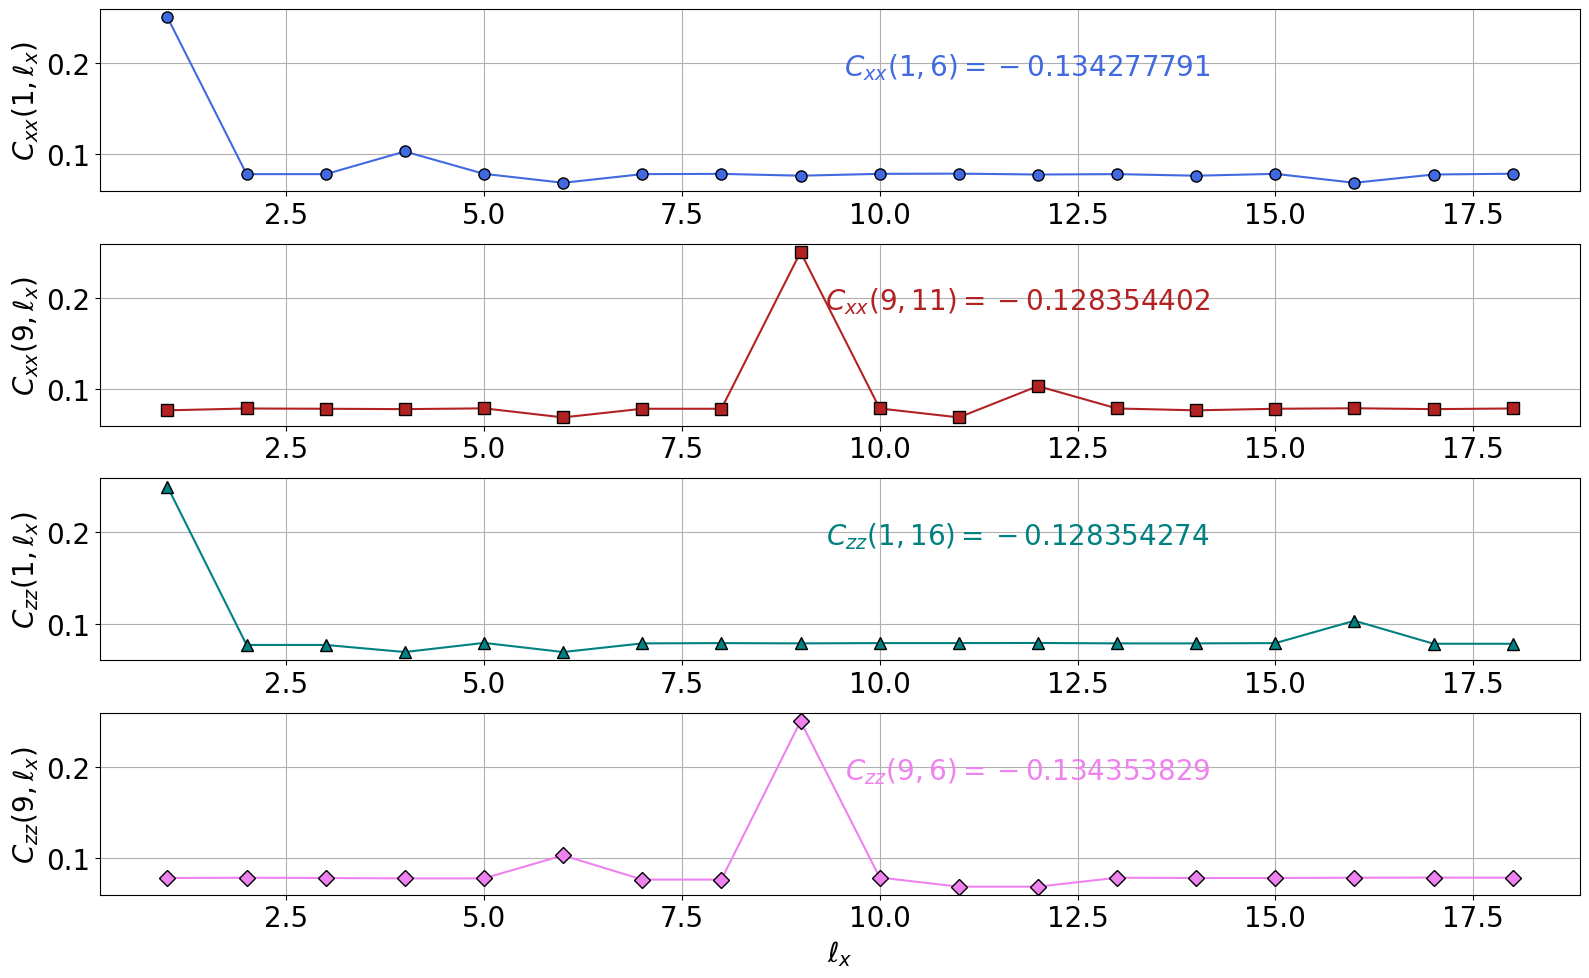

In [127]:
'''
    Analyze the Kitaev model on a honeycomb lattice with the Zeeman coupling of spins to a magnetic field
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 4, ncols = 1, figure = fig)

# Plot the history of energy convergence
nsweeps = 12
E0_file = ["data/L3W3_FM/2d_kitaev_FM_h0.5.h5"]
symbol = ["o", "s", "^", "D"]
color = ["royalblue", "firebrick", "teal", "violet"]
label = [r"$N = 2 \times 3 \times 3$"]
sites = [18]

ax = fig.add_subplot(spec[0, 0])
for index, tmp_file in enumerate(E0_file):
    Cxx = data_extrapolation(tmp_file, 'Cxx')
    ax.plot(np.arange(1, sites[0] + 1), Cxx[0, :].real, color = color[index], marker = symbol[index], markersize = 8, \
            markeredgecolor = 'black', label = label[index])
print(Cxx[0, :].real)
ax.text(0.75, 0.6, r'$C_{xx}(1, 6) = -0.134277791$', verticalalignment='bottom', horizontalalignment='right', \
        transform=ax.transAxes, color = color[index], fontsize = 20)
# ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$C_{xx}(1, \ell_{x})$', fontsize = 20)    
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.grid() 

ax = fig.add_subplot(spec[1, 0])
for index, tmp_file in enumerate(E0_file):
    Cxx = data_extrapolation(tmp_file, 'Cxx')
    ax.plot(np.arange(1, sites[0] + 1), Cxx[8, :].real, color = color[index + 1], marker = symbol[index + 1], markersize = 8, \
            markeredgecolor = 'black', label = label[index])
print(Cxx[8, :].real)  
ax.text(0.75, 0.6, r'$C_{xx}(9, 11) = -0.128354402$', verticalalignment='bottom', horizontalalignment='right', \
        transform=ax.transAxes, color = color[index + 1], fontsize = 20)
# ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$C_{xx}(9, \ell_{x})$', fontsize = 20)    
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.grid() 

ax = fig.add_subplot(spec[2, 0])
for index, tmp_file in enumerate(E0_file):
    Czz = data_extrapolation(tmp_file, 'Czz')
    ax.plot(np.arange(1, sites[0] + 1), Czz[0, :].real, color = color[index + 2], marker = symbol[index + 2], markersize = 8, \
            markeredgecolor = 'black', label = label[index])
print(Czz[0, :])
ax.text(0.75, 0.6, r'$C_{zz}(1, 16) = -0.128354274$', verticalalignment='bottom', horizontalalignment='right', \
        transform=ax.transAxes, color = color[index + 2], fontsize = 20)
# ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(1, \ell_{x})$', fontsize = 20)    
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.grid()  

ax = fig.add_subplot(spec[3, 0])
for index, tmp_file in enumerate(E0_file):
    Czz = data_extrapolation(tmp_file, 'Czz')
    ax.plot(np.arange(1, sites[0] + 1), Czz[8, :].real, color = color[index + 3], marker = symbol[index + 3], markersize = 8, \
            markeredgecolor = 'black', label = label[index])
print(Czz[8, :]) 
ax.text(0.75, 0.6, r'$C_{zz}(9, 6) = -0.134353829$', verticalalignment='bottom', horizontalalignment='right', \
        transform=ax.transAxes, color = color[index + 3], fontsize = 20)
ax.set_xlabel(r'$\ell_{x}$', fontsize = 20)
ax.set_ylabel(r'$C_{zz}(9, \ell_{x})$', fontsize = 20)    
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.grid()  

# plt.savefig('notes/figures/2d_kitaev_honeycomb_lattice_pbc_correlation_function_L6W3_AFM.pdf')

<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
-0.33333331864454135
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
-0.3333333232107132
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
-0.33333326845891276


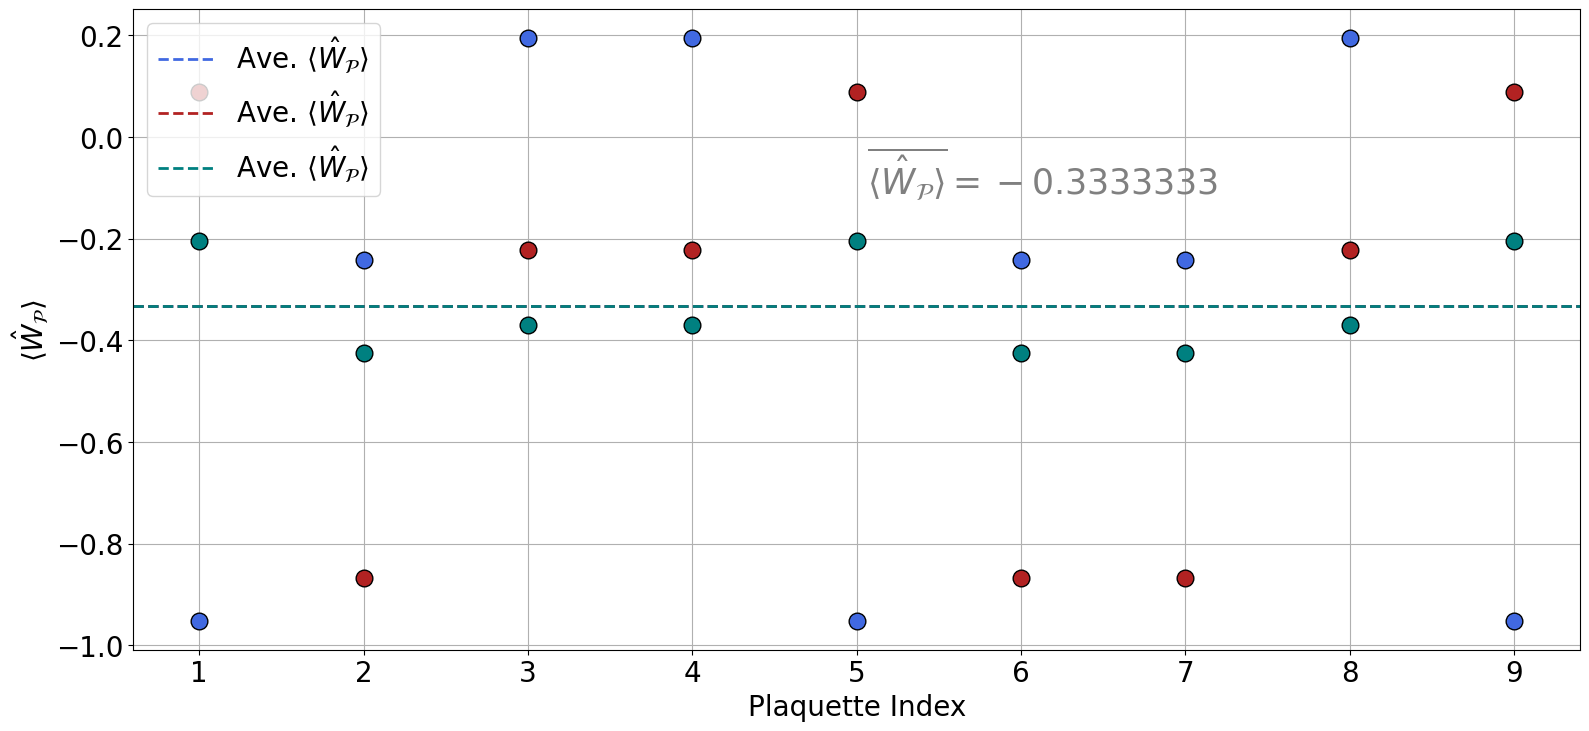

In [138]:
'''
    Analyze the eigenvalues of the plaquette operators
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)

# Plot the eigenvalues for all the plaquette operators
E0_file = ["data/2d_kitaev_honeycomb_lattice_pbc_rings_L6W3_AFM_v1.h5", \
           "data/2d_kitaev_honeycomb_lattice_pbc_rings_L6W3_AFM_v2.h5", \
           "data/2d_kitaev_honeycomb_lattice_pbc_rings_L6W3_AFM_v3.h5"]
symbol = ["o", "s", "D"]
color = ["royalblue", "firebrick", "teal"]

ax = fig.add_subplot(spec[0, 0])
for index, tmp_file in enumerate(E0_file):
    E0 = -data_extrapolation(tmp_file, 'plaquette'); print(np.mean(E0))
    ax.plot(np.arange(1, E0.shape[0] + 1), E0, linestyle = " ", color = color[index], marker = "o", markersize = 12, markeredgecolor = "black")
    ax.axhline(np.mean(E0), linestyle = "--", linewidth = 2, color = color[index], label = r"Ave. $\langle \hat{W}_{\mathcal{P}} \rangle$")
ax.text(0.75, 0.7, r'$\overline{\langle \hat{W}_{\mathcal{P}} \rangle} = -0.3333333$', verticalalignment='bottom', horizontalalignment='right', transform=ax.transAxes, color = "gray", fontsize = 25)
ax.set_xlabel(r'Plaquette Index', fontsize = 20)
ax.set_ylabel(r'$\langle \hat{W}_{\mathcal{P}} \rangle$', fontsize = 20)    
# ax.set_ylim(0.999, 1.001)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

# plt.savefig('notes/figures/2d_kitaev_honeycomb_lattice_AFM_plaquette_eigenvalues.pdf')

In [139]:
def generate_input_file(input_field):
    '''Generate corresponding folders and input files based on chemical potential'''

    if int(input_field * 1000) % 100 == 0:
        folder_name = "data/L3W3_AFM/2d_kitaev_FM_h" + "{:.1f}".format(input_field) + ".h5"
    elif int(input_field * 1000) % 10 == 0:
        folder_name = "data/L3W3_AFM/2d_kitaev_FM_h" + "{:.2f}".format(input_field) + ".h5"
    else:
        folder_name = "data/L3W3_AFM/2d_kitaev_FM_h" + "{:.3f}".format(input_field) + ".h5"
    return folder_name

In [140]:
field = np.around(np.arange(0.0, 0.501, 0.001), 3)
W_eigenvalues = []
field_to_plot = []
for index, tmp in enumerate(field):
    tmp_folder = generate_input_file(tmp)
    if os.path.exists(tmp_folder):
        # print(tmp_folder)
        field_to_plot.append(tmp)
        W_eigenvalues.append(-1.0 * (data_extrapolation(tmp_folder, 'plaquette')))

<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5

In [141]:
E0 = []
for index, tmp in enumerate(field):
    tmp_folder = generate_input_file(tmp)
    if os.path.exists(tmp_folder):
        E0.append(data_extrapolation(tmp_folder, 'E0'))

<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5 ['Cxx', 'Cyy', 'Czz', 'E0', 'E0variance', 'Ehist', 'NormalizedE0', 'Sx', 'Sx0', 'Sy', 'Sy0', 'Sz', 'Sz0', 'plaquette', 'psi']>
<KeysViewHDF5

In [142]:
W_eigenvalues = np.array(W_eigenvalues)
ave = np.mean(W_eigenvalues, axis = 1)
# W_eigenvalues.shape
ave.shape

(501,)

In [143]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

y_spl = UnivariateSpline(field_to_plot, np.array(E0) / (2 * 4 * 4), s = 0, k = 4)
y_spl_2d = y_spl.derivative(n=2)
x_range = np.linspace(0, 0.5, 10000)

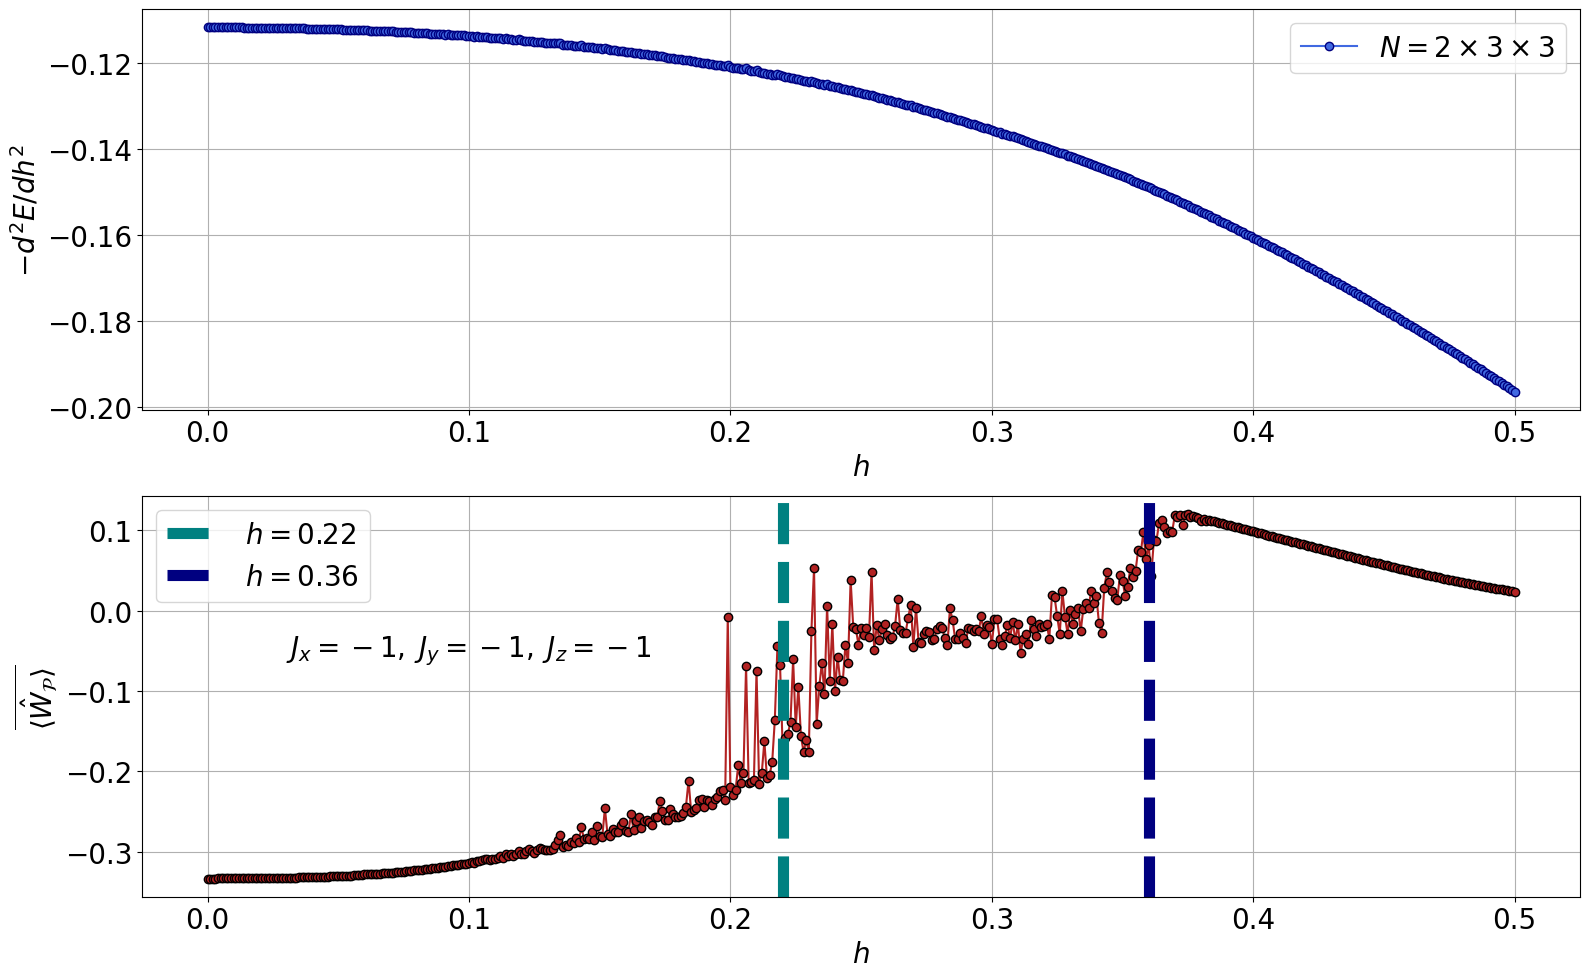

In [153]:
'''
   Analyze the field strength dependence of the Kitaev honeycomb lattice
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)

# Plot the eigenvalues of the W operators as a function of field strength
color = ["royalblue", "firebrick", "teal", "navy"]

ax = fig.add_subplot(spec[0, 0])
ax.plot(field_to_plot, np.array(E0) / (2 * 4 * 4), marker = "o", markersize = 6, color = color[0], markeredgecolor = "navy", label = r"$N = 2 \times 3 \times 3$")
# ax.plot(x_range, -y_spl_2d(x_range), marker = "o", markersize = 6, color = color[0], markeredgecolor = "navy", label = r"$N = 2 \times 3 \times 3$")

# ax.set_xlim(0, 0.1)
ax.set_xlabel(r"$h$", fontsize = 20)
ax.set_ylabel(r'$-d^{2} E / d h^{2}$', fontsize = 20)  
# ax.set_ylabel(r'$E_{0}/N_{S}$', fontsize = 20)  
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

ax = fig.add_subplot(spec[1, 0])
ax.plot(field_to_plot, ave, marker = "o", markersize = 6, color = color[1], markeredgecolor = "black")
ax.axvline(0.22, linestyle = "--", linewidth=8, color = "teal", label = r"$h = 0.22$")
ax.axvline(0.36, linestyle = "--", linewidth=8, color = "navy", label = r"$h = 0.36$")

ax.text(0.1, 0.6, r"$J_{x} = -1, \; J_{y} = -1, \; J_{z} = -1$", fontsize = 20, transform=ax.transAxes)
ax.set_xlabel(r'$h$', fontsize = 20)
ax.set_ylabel(r'$\overline{\langle \hat{W}_{\mathcal{P}} \rangle}$', fontsize = 20)  
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

plt.savefig('notes/figures/2d_kitaev_honeycomb_AFM_energy_and_plaquette.pdf')

In [120]:
E0_FM = [-5.806689557394597, -5.961638229036823, -6.0287109683613895, -6.065288471536409, -6.127887485514859, -6.16517647762358, \
         -6.210665806946101, -6.247512232024698, -6.263195072509279, -6.267321278690165, -6.268584601593979, -6.268905440259012, -6.268998958090542]
E0_AFM = [-5.757389519659989, -5.916247228209783, -6.027603401837154, -6.064178091771611, -6.113508754985899, -6.180333076368459, \
         -6.22795134312708, -6.253432525671877, -6.265369335716011, -6.268416856251674, -6.268956151140677, -6.269066257841143, -6.269156215741557]

-0.19591113174192365 -0.19590621744032943


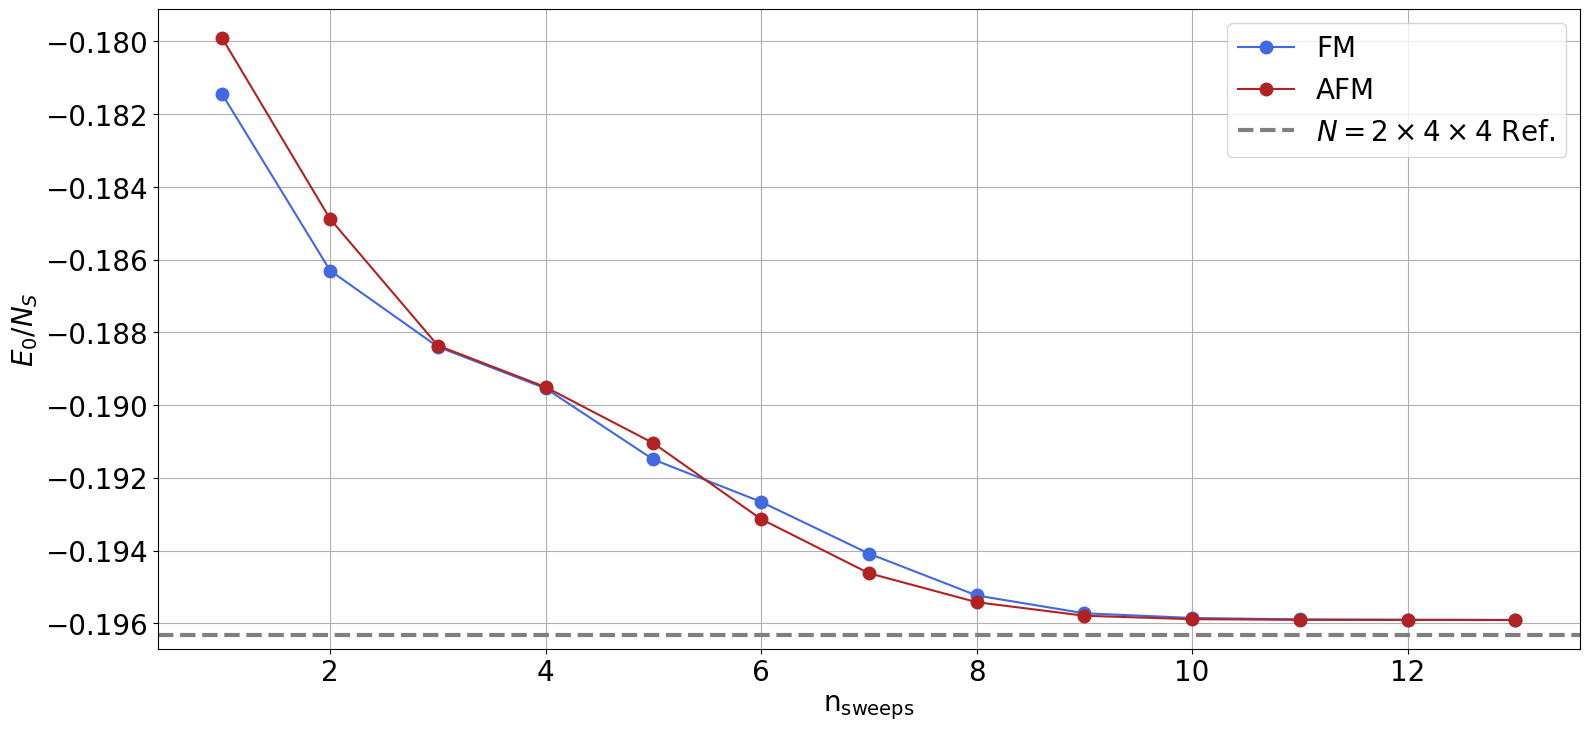

In [124]:
'''
    Analyze the energy convergence of the Kitaev model on a honeycomb lattice
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)

# Plot the history of energy convergence
ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, len(E0_FM) + 1), np.array(E0_FM) / 32, color = "royalblue", marker = "o", markersize = 9, label = "FM")
ax.plot(np.arange(1, len(E0_AFM) + 1), np.array(E0_AFM) / 32, color = "firebrick", marker = "o", markersize = 9, label = "AFM")
print(E0_AFM[-1]/32, E0_FM[-1]/32)
ax.axhline(y = -0.19631386, linestyle = "--", linewidth = 3, color = "gray", label = r"$N = 2 \times 4 \times 4$ Ref.")   

ax.set_xlabel(r'$\rm n_{sweeps}$', fontsize = 20)
ax.set_ylabel(r'$E_{0} / N_{S}$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 1)
ax.grid()  

plt.savefig('notes/figures/2d_kitaev_honeycomb_lattice_PBC_energy_convergence_L4W4.pdf')

##### ANALYZE THE HEISENBERG MODEL IN TWO DIMENSIONS ON A TRIANGULAR LATTICE

In [ ]:
Sz = data_extrapolation("data/2d_heisenberg_triangular_lattice.h5", "Sz")

In [25]:
Nx = 16 
Ny = 4
N = Nx * Ny

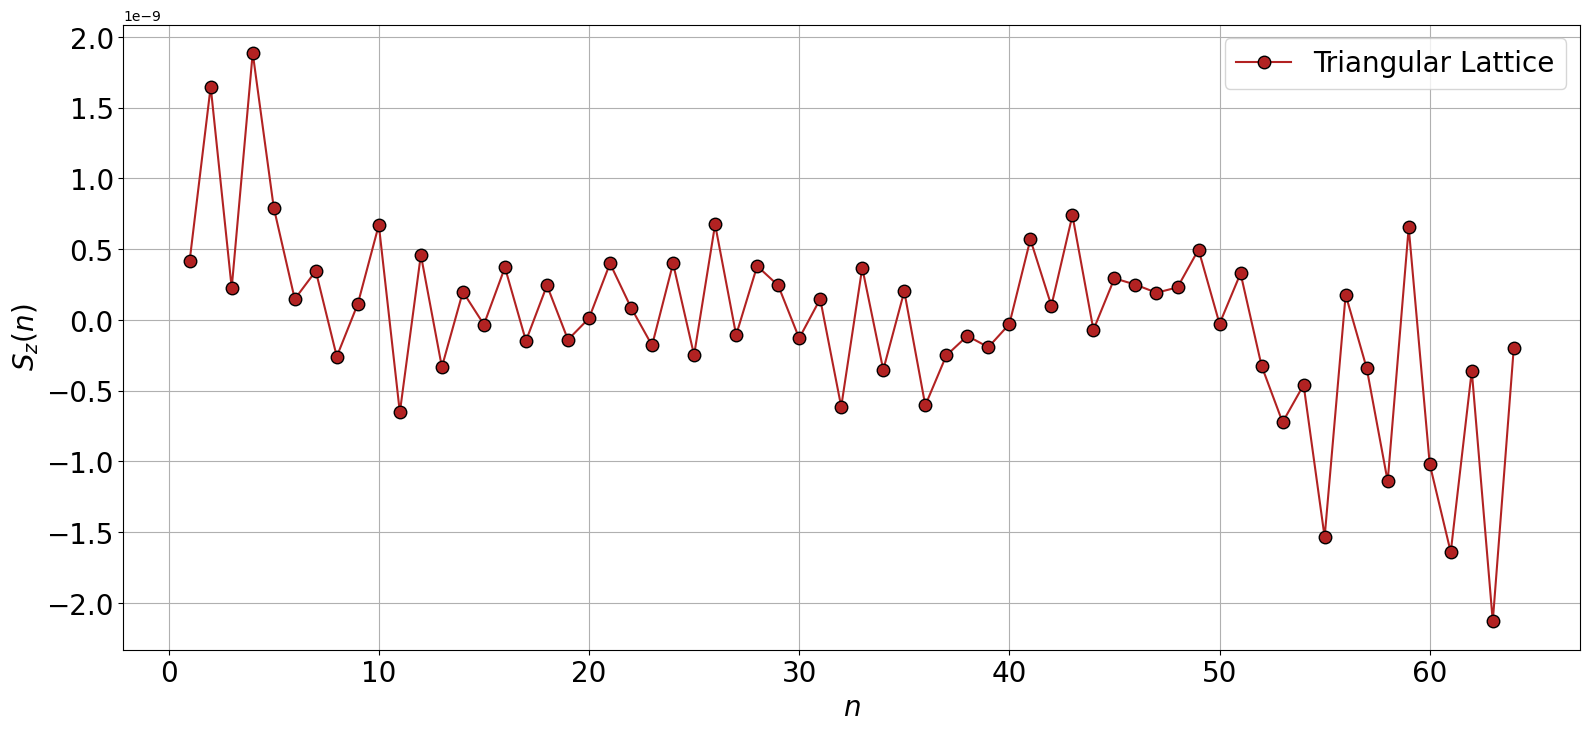

In [26]:
'''
    Analyze the ground-state properties of the Heisenberg model with J1 and J2 terms
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 1, ncols = 1, figure = fig)
color = obtain_colors(15, cm.gist_heat_r)

# Plot initial and final Sz
ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, N + 1), Sz.real, color = "firebrick", marker = 'o', markersize = 9, \
        markeredgecolor = 'black', label = r'Triangular Lattice')
    
ax.set_xlabel(r'$n$', fontsize = 20)
ax.set_ylabel(r'$S_{z}(n)$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20) 
ax.legend(frameon = True, fontsize = 20, ncol = 5)
ax.grid()  

# plt.savefig(figures/Heisenberg_TEBD_Benchmark_N8_AFM_Initialization.pdf')

##### ANALYZE THE KITAEV MODEL WITH MAGNETIC FIELDS AND VACANCIES

In [101]:
def extract_observables_from_hdf5(input_path):
    tmp_field = []
    tmp_energy = []
    tmp_Ehist = []
    tmp_plaquette = []
    tmp_WLy = []
    tmp_order = []
    tmp_bond = []
    
#     print(input_path)
    if os.path.exists(input_path):
        # print(input_path)
        tmp_energy.append(data_extrapolation(input_path, 'E0'))
        tmp_Ehist.append(data_extrapolation(input_path, "Ehist"))
        tmp_bond.append(data_extrapolation(input_path, "Bond"))
        tmp_plaquette.append(data_extrapolation(input_path, "Plaquette"))
        tmp_WLy.append(data_extrapolation(input_path, "Loop"))
        tmp_order.append(data_extrapolation(input_path, 'OrderParameter'))
    
    return tmp_energy, tmp_Ehist, tmp_bond, tmp_plaquette, tmp_WLy, tmp_order

In [237]:
file = ["2d_kitaev_FM_L18W3_right_epsilon1E-10.h5", "2d_kitaev_FM_L24W3_right_epsilon1E-10.h5", \
        "2d_kitaev_FM_L30W3_right_epsilon1E-10.h5", "2d_kitaev_FM_L16W4_Right.h5"]

-10.381266484103714
-13.98098373912379
-17.580701013793583


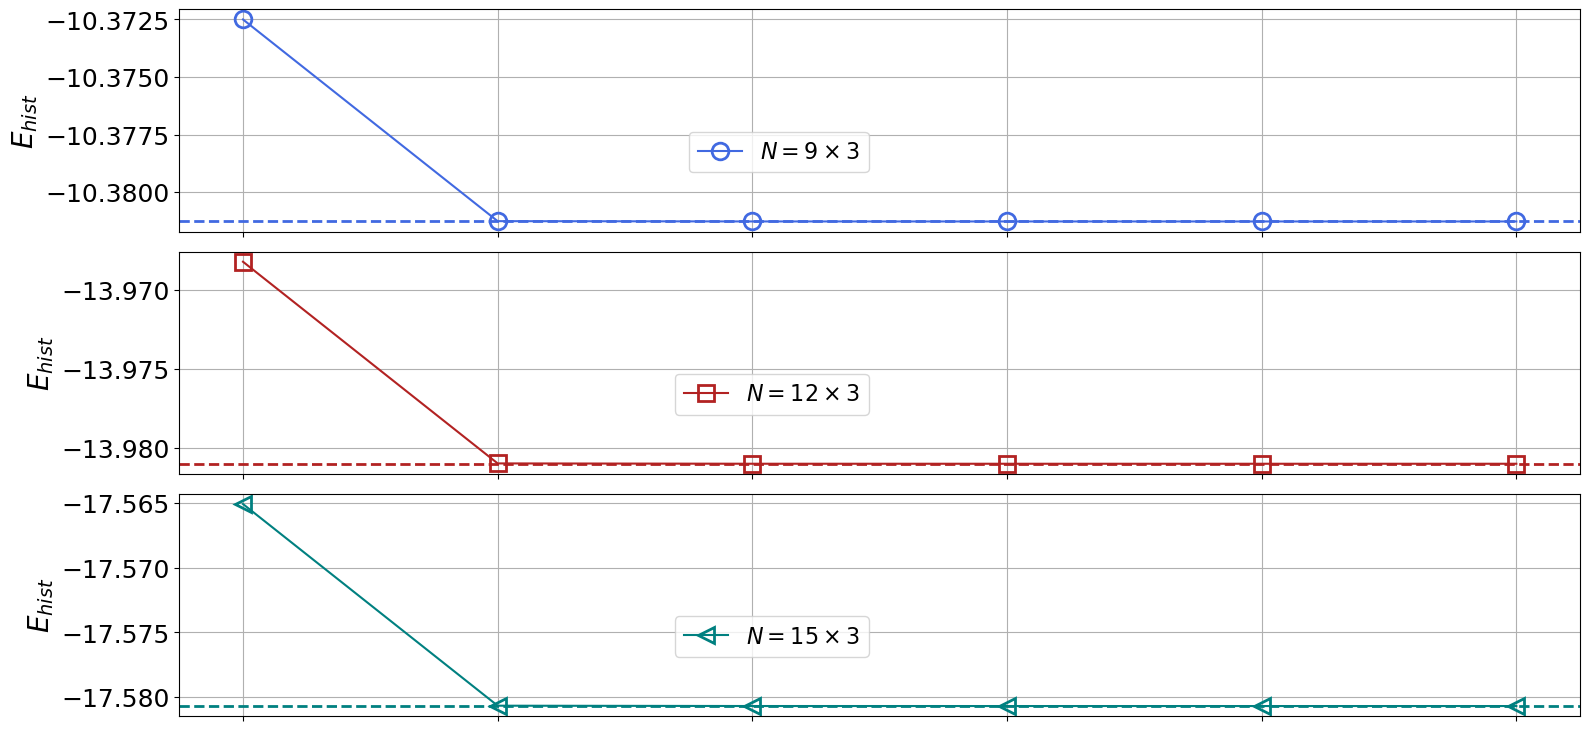

In [243]:
'''
   Analyze the energy convergence with twisted boundary condition
'''

fig = plt.figure(figsize = (16, 12 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)
marker = ["o", "s", "<", "^", ">", "D"]
color = ["royalblue", "firebrick", "teal", "darkviolet"]
label = [r"$N = 9 \times 3$", r"$N = 12 \times 3$", r"$N = 15 \times 3$", r"$N = 8 \times 4$"]

input_file = file[ : 3]
for index, tmp_file in enumerate(input_file):
    ax = fig.add_subplot(spec[index, 0])
    tmp_path = "data/test/BC/" + tmp_file
    tmpE, tmp_Ehist, _, _, _, _ = extract_observables_from_hdf5(tmp_path) 
    tmp_Ehist = np.array(tmp_Ehist)
    tmpE = tmpE[0]
    print(tmpE)
    
    ax.plot(np.arange(1, tmp_Ehist.shape[1] + 1, 1), tmp_Ehist[0, :], linestyle = "-", color = color[index], marker = marker[index], markeredgewidth = 2, \
            markersize = 12, markerfacecolor = "none", label = label[index])
    ax.axhline(tmpE, linewidth = 2, linestyle = "--", color = color[index])
    
    if index == len(file) - 1:
        ax.set_xlabel(r"Iteration #", fontsize = 20)
    else:
        ax.set_xticklabels([])
        
    ax.set_ylabel(r'$E_{hist}$', fontsize = 20)  
    ax.tick_params(axis = 'both', which = 'major', labelsize = 18) 
    ax.legend(frameon = True, fontsize = 16, ncol = 2, bbox_to_anchor = [0.5, 0.5])
    ax.grid()  

plt.savefig("notes/figures/tests/FM/2d_kitaev_energy_convergence_epsilon1E-10.pdf")

data/test/BC/2d_kitaev_FM_L16W4_Right.h5
data/test/BC/2d_kitaev_FM_L16W4_Right.h5


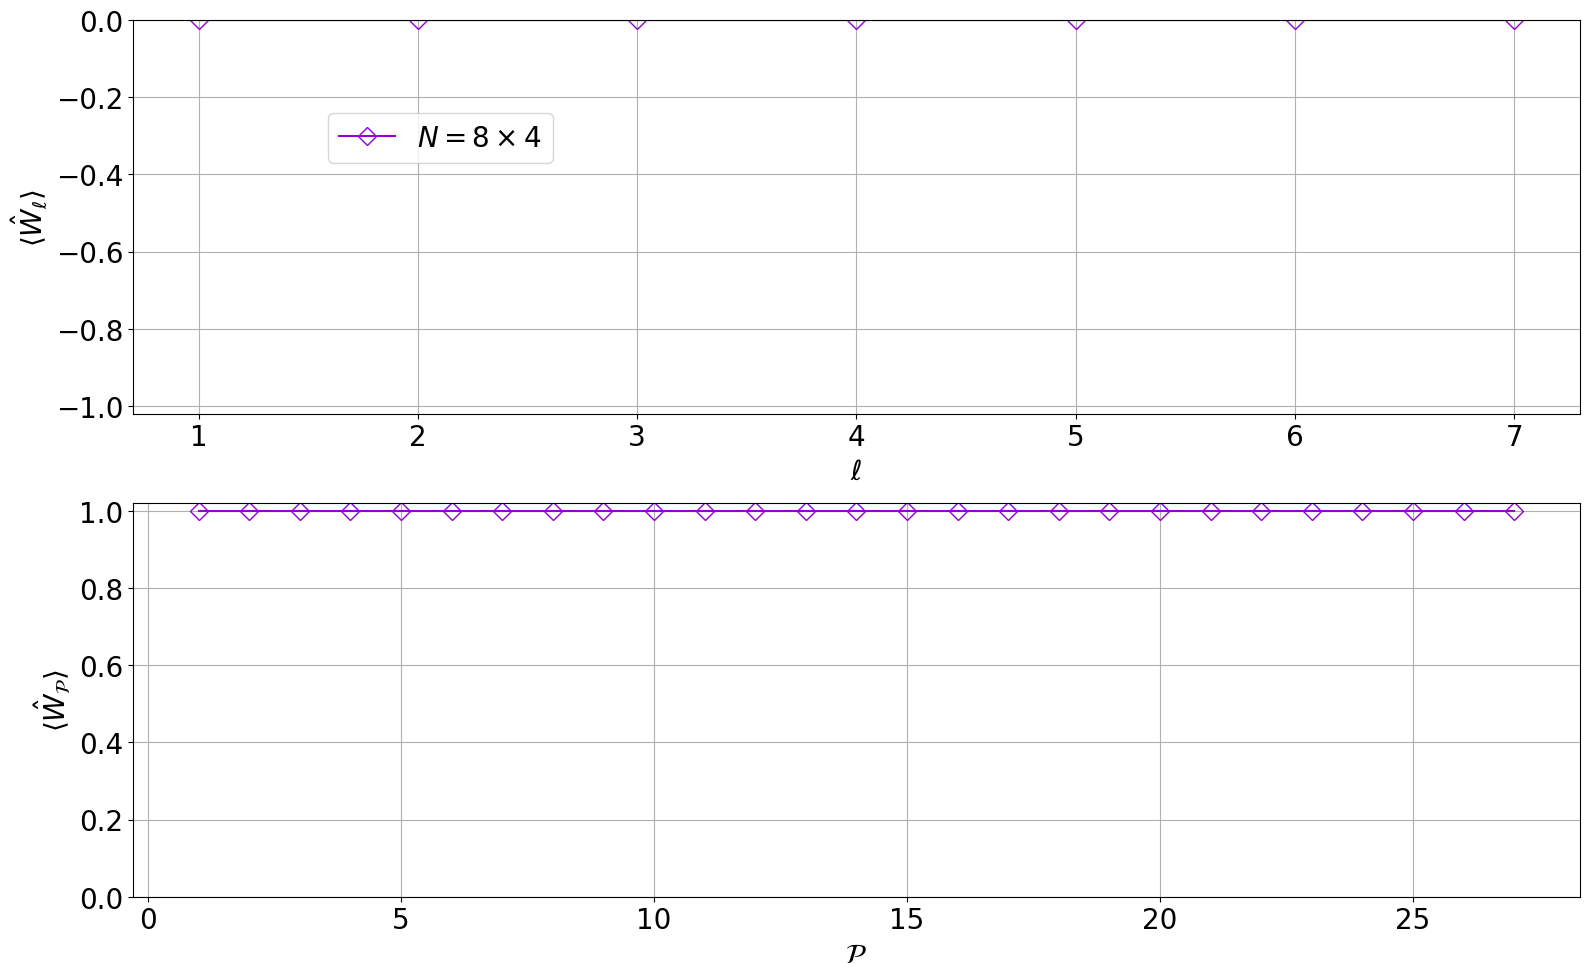

In [193]:
'''
   Analyze the field strength dependence of the Kitaev honeycomb lattice
'''

fig = plt.figure(figsize = (16, 16 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 2, ncols = 1, figure = fig)
marker = ["o", "s", "^", "D"]
color = ["royalblue", "firebrick", "teal", "darkviolet"]
label = [r"$N = 9 \times 3$", r"$N = 12 \times 3$", r"$N = 15 \times 3$", r"$N = 8 \times 4$"]

# Plot the energy as a function of magnetic fields
index = 3
ax = fig.add_subplot(spec[0, 0])
path = "data/test/BC/" + file[index]; print(path)
_, _, _, _, loop, _ = extract_observables_from_hdf5(path)  
loop = np.array(loop)

ax.plot(np.arange(1, 8), loop[0, :], color = color[index], \
            marker = marker[index], markersize = 9, markerfacecolor = "none", label = label[index])
ax.set_ylim(-1.02, 0)

ax.set_xlabel(r'$\ell$', fontsize = 20)
ax.set_ylabel(r"$\langle \hat{W}_{\ell} \rangle$", fontsize = 20)  
ax.legend(frameon = True, fontsize = 20, ncol = 1, bbox_to_anchor = [0.3, 0.8], bbox_transform = ax.transAxes)   
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
path = "data/test/BC/" + file[index]; print(path)
_, _, _, plaquette, _, _ = extract_observables_from_hdf5(path)  
plaquette = np.array(plaquette)

ax.plot(np.arange(1, 28), plaquette[0, :], color = color[index], \
            marker = marker[index], markersize = 9, markerfacecolor = "none")
ax.set_ylim(0, 1.02)

ax.set_xlabel(r'$\mathcal{P}$', fontsize = 20)
ax.set_ylabel(r"$\langle \hat{W}_{\mathcal{P}} \rangle$", fontsize = 20)  
ax.tick_params(axis = 'both', which = 'major', labelsize = 20) 
ax.grid()  

# plt.savefig("notes/figures/tests/FM/2d_kitaev_L12W3_epsilon1E-8.pdf")